<a href="https://colab.research.google.com/github/lchutny/W207_ALSY_FinalProject/blob/master/W207_ALSY_FinalProject_Baseline_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project W207
## Andrew Webb, Laura Chutny, Suzy Choi, Yue Hu

# 1. From Kaggle
Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center  
right_eye_center  
left_eye_inner_corner  
left_eye_outer_corner  
right_eye_inner_corner  
right_eye_outer_corner  
left_eyebrow_inner_end  
left_eyebrow_outer_end  
right_eyebrow_inner_end  
right_eyebrow_outer_end  
nose_tip  
mouth_left_corner  
mouth_right_corner  
mouth_center_top_lip  
mouth_center_bottom_lip  

Left and right here refers to the point of view of the subject.  

In some examples, some of the target keypoint positions are missing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

## Why do we care?

Facial recognition has a variety of applications, notably in biometrics. Rather than sign into a phone or laptop, give a username and password for a service, or use some form of document identification, people can use their faces to identify themselves. As with fingerprints, no two faces are exactly alike, so this is actually a more robust form of identification than usernames, passwords, documents, etc. that can either be forged or stolen. In order to properly leverage facial recognition for identification, however, the key facial features must be identified with a high level of accuracy. Identifying key facial features given images of faces in a variety of contexts is a key aspect of leveraging facial recognition for personal identification. If we can accurately identify the facial keypoints of a given image in a variety of contexts, we can make sure that we can also accurately identify who the person associated with the face is (or that the image is even of a human face).

#### Data files - have been uploaded to GitHub Repo
- training.csv: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.  
- test.csv: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
- submissionFileFormat.csv: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict.

# 2. Plan
1. Data Cleaning
- TBD based on the tutorial

2. Identify ways to categorize images (i.e. this image the person is looking down, this one they are looking left, etc.) and add these features to the data

3. Split data - use training set and split into train, dev and test.

> 3a. Add training examples (pending feasibility)
*   by reversing the image
*   by generating images from the NB model

4. kNN; MN Naive Bayes; Logistic Regression --> run and compare as base

5. Maybe run

6. Then learn and run Neural Net to classify

**QUESTIONS / Comments - Laura (July 12/13)**

_Per Class Discussions - breakdown the problem:_

* In this problem set: Given $X$ - a 96x96 pixel image of a face (a 1 x 9216 vector of pixel values); predict $\hat Y$ - the x and y coordinates of 15 specific facial keypoints (list above), or alternately fill in the values for missing keypoints where some are given in a test case.

* Data given is the labeled (or semi-labeled) images ($X$). This is a supervised learning problem. The labels ($Y$) are continuous values (x,y coordinate pairs - in essence a 15 x 2 array of x,y values for 15 facial keypoints)

* Features are the values of the pixels in the image and their relationship to each other (format of the relationship TBD)  
  - Commentary on feature engineering - some more research here
  - Features (pixels) will be reduced to values between 0 and 1 (vs original 256 grayscale)
  - for all models the features will be in a 1 x 9216 except for Convolutional NN which needs them reshaped to a 96x96 matrix
  - May want to apply a blur to the images - as per our digit exercise - in order to assist in recognition
  - We have a Curse of Dimensionality - very high dimension feature space (9216) and a relatively small number of examples and only 15 features to train on (~2140 complete examples, up to 6000 if we include those only partially labeled). This data is extremely sparse which may mean that multiple hidden layers are better in the Neural net and likely means that other models will fare poorly.
  

* Model to use: we will try various models - from simiplistic kNN, NaiveBayes and Logistic Regression to compare and to learn about the data. We will move on to Neural Net with various numbers of hidden layers (2? 3? more?). Eventually we will need a convolutional neural net.
  - Sigmoid or softmax or other activation? How to decide?
  - What *is* a convolutional neural net (cNN): *'The role of the cNN is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction'*
  - Why would a cNN be the best model
  - Why use RMSE to evaluate model
  - What tolerance will the x,y coordinates have to meet to say that they are predicting correctly? (i.e. to what decimal place?)
  - Type of pooling to use in pooling layers of CNN - likely max pooling is better (reduces noise)
  - then likely add a fully connected layer after the convolational layers to introduce non-linearities
  
* Issues that may be encountered:  
  - Dealing with data that is missing - see point 2 below - and impact on the model
  - Images contain a large variation regarding centering and this may impact the behaviour of the model
  - As we are dealing with multiple labels, do we do it with an all-or-nothing approach (i.e. predict all 15 labels correctly, or zero), or can we do a 'sliding-scale' of prediction - i.e. the more facial keypoints detected correctly, the higher the score?

  
* Assumptions:  
  - All faces are human and have detectable keypoints
  -  ? More
  
* References:
  - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 - an excellent description of what a CNN is.
  
  

_Questions_

1.   What are we predicting on - the kaggle competition indicates we should be predicting the missing x or y coordinate of the specified feature. Where is this file?? (submissionFileFormat.csv)?
2. This is a 'multi-label' problem - each example (image) has 15 'labels'. Not all examples have all labels. In the approach above, we have eliminated about half the training data. Once we get to the end, we should go back and revisit this and see if we can improve training by changing this:
  *   Train again only on the labels that span the whole training set (4 labels)
  *   Train using images that have missing features and incorporate that into the model (i.e. maybe there are patterns with the images that have missing features?)
  *   Reduce the label data using clustering (create new labels) and train again  - not sure how to un-transform the prediction tho
3. For the NN - using sigmoid activation may help us in the predictions
4. Do we need to shuffle the training data
5. In data processing ahead of training - lots to do here:
- Deal with images that aren't centered (will need examples. once we have those we can play around with transformation)




# 3. Baseline & Schedule
Due Week 10: (July 8)
- Plan for project
- Do Tutorial
- EDA / Cleaning
- More detailed plan around project (maybe a pseudocode type plan)
- check out Google colab - using this
- Theano - install - no need when using colab

Week 11/12 (July 15 and 22)
July 15 - Office Hours - Andrew - ask questions about package recommendations and discuss document.
July 21 - Tentative meeting: 6 PM Pacific, 7 PM Mountain, 8 PM Central, 9 PM Eastern

Week 12 - Checkin with Instructor  (July 22)

Week 14 - Project due (August 5)

--------

Week of July 15 - 21
  - Finish Kaggle Tutorial & Week 7
  - Finish Section 5 - more EDA - Laura
  - Finish Section 6 - kNN - Suzy
  - Finish Section 7 - Multinomial NB - Yue
  - Finish Section 8 - Logistic Regression - Andrew 


Week of July 22 - 28  
  - Running NN #1  - Single and 2 layer
  - Running NN #2 - First pass at a convolution layer
  - Running NN #3 - Second pass/revision at multiple convolution layers
  - Running NN #4 - Final pass - most improved cNN


Week of July 29 - August 4  
  - xx
  - Finish write up 





# 4. Setup

In [0]:
# ADD OTHER IMPORTS HERE AS NECESSARY
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import csv
import os

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Theano imports
import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
print(theano.config.device) # We're using CPUs (for now)
print(theano.config.floatX) # Should be 64 bit for CPUs
np.random.seed(0) # Setting random seed


cpu
float64


In [0]:
print("python version =",sys.version)
print("Pandas Version = ",pd.__version__)
print("Numpy Version = ",np.__version__)

python version = 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas Version =  0.24.2
Numpy Version =  1.16.4


In [0]:
# Run this cell to mount your Google Drive - if that is where you want to access your data from
from google.colab import drive
drive.mount('/content/drive')
# Make sure to upload from your local machine and then this path will work

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 5. Data Import and Cleaning
 - There is a Train and Test sample in the data from Kaggle
 - We should split the Train data into Train and Dev - and optimize on Dev; Save Test for the very last step in each method.
 - Select an appropriate scoring method (per the Kaggle contest and maybe one other as well)

### Approaches to data load, cleaning, and transformation



There are images in the data that are either

  *   *Missing* feature labels (i.e. The face is centered but things like left_eyebrow_inner_end are not labeled)
  *   Having the person in the image face down, left, right, up, etc. and the feature labels are *not available* (i.e. if a person is facing left, some of their left features will not be available)



As the former point (missing labels) seems more prevelent, we can start there. One option will be to load data that only has complete labels. This can be added to the load data function with a parameter to set the option if we want to load all the data or just "complete" data. We can then train a model on the complete data and perhaps use it to "fill-in" other aspects of the training data which have missing labels


Then we will need to address the second point (labels not available). It will be necessary to find examples of people facing various directions and see if we can use any logic to add a dummy variable for each scenario (facing left, right, down, up, etc.)


In [0]:
# Utilize a function to load and tidy up the data

# Update with filepath. Just uncomment the code to get your filepath to work
# Andrew's filepath
filepath = '/content/drive/My Drive/FinalProject_w207/'
# Suzy's filepath
#filepath = '/content/drive/My Drive/FinalProject_w207/'
# Yue's filepath
#filepath = ''
# Laura's filepath
#filepath = '/content/'


def load_data(data_type='train', columns=None, filepath=filepath, data='complete'):
  """Load the data from Kaggle.
  A filepath string variable gives the path to the csv data
  
  If data_type = 'train', then load the train data
  If data_type = 'dev', then load the dev data
  If data_type = 'test', then load the test data.
  
  If data = 'complete', then only images with complete labels are returned
  If data = 'incomplete', then only images ANY with NaN label values are returned
  If any other value, then all images are returned
  
  You can also pass in a list of columns if you only want a subset
  """
  
  # create a DataFrame object with the training.csv data
  # shuffle records in the csv file
  df = shuffle(pd.DataFrame(pd.read_csv(filepath + 'training.csv')),
              random_state = 42) # set a seed for development
  
  # Use the first 6000 records for training
  train_data = df[:6000]
  
  # And the rest for dev
  dev_data = df[6000:]
  
  # Test data
  test_data = pd.DataFrame(pd.read_csv(filepath + 'test.csv'))
  
  if data_type == 'train':
    df = train_data
    
  elif data_type == 'dev':
    df = dev_data
    
  elif data_type == 'test':
    df = test_data
    
  else:
    print('Something went wrong with the train/dev/test data assignment')
    
  # train and dev data will have labels (facial keypoints) as well as an associated image
  # test data only has the image column
  # the image column is a string field delimited by spaces
  # we will split the image column and turn it into a numpy array
  
  # Assign the X variable to the image
  df['Image'] = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
  
  # if the columns were passed in to the function
  if columns:  
    df = df[list(columns) + ['Image']]
  
  # prints the number of values for each column
  print("Number of Values Each Column =\n",df.count())  

  # drop all rows that have missing values in them if data == 'complete'
  # this will ONLY output images that have no unavailable labels 
  # (i.e. no images with faces turned left/right/up/down and no missing values)
  if data == 'complete':
    df = df.dropna() 
    print("Number of rows total after dropping missing valued data =",df.shape[0])
    
  # include only images that have missing or unavailable labels
  # this can be used to help "fill-in" missing values to increase the training set
  elif data == 'incomplete':
    df = df[df.isnull().any(1)]
    print("Number of rows total after dropping completely labeled data =",df.shape[0])
    
  # include all rows of the data
  else:
    print("Number of rows having no data dropped =", df.shape[0])
  
  # scale pixel values to [0, 1]
  X = np.vstack(df['Image'].values) / 255.  
  X = X.astype(np.float32)
  
  # Assign y variable to labels, if applicable (i.e. if we are not using test data)
  if data_type == 'test':
    y = None
  else:
    # set y to equal all but the last column (only the labels, not the image)
    y = df[df.columns[:-1]].values
    # scale target coordinates to [-1, 1] - i.e. center of the image is x=y=0
    y = (y - 48) / 48
    # shuffle train data
    #X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
    # Add label_names here for easy output in the project
    label_names = df.columns[:-1].astype(np.str)
    
  return X, y, label_names
  
      

In [0]:
# get train data into X and y and print number of values in each column
train_X, train_y, train_lables = load_data(data_type = 'train', data='complete')
print("X shape:",train_X.shape,"y shape",train_y.shape)


Number of Values Each Column =
 left_eye_center_x            5991
left_eye_center_y            5991
right_eye_center_x           5988
right_eye_center_y           5988
left_eye_inner_corner_x      1954
left_eye_inner_corner_y      1954
left_eye_outer_corner_x      1950
left_eye_outer_corner_y      1950
right_eye_inner_corner_x     1952
right_eye_inner_corner_y     1952
right_eye_outer_corner_x     1950
right_eye_outer_corner_y     1950
left_eyebrow_inner_end_x     1954
left_eyebrow_inner_end_y     1954
left_eyebrow_outer_end_x     1916
left_eyebrow_outer_end_y     1916
right_eyebrow_inner_end_x    1955
right_eyebrow_inner_end_y    1955
right_eyebrow_outer_end_x    1925
right_eyebrow_outer_end_y    1925
nose_tip_x                   6000
nose_tip_y                   6000
mouth_left_corner_x          1951
mouth_left_corner_y          1951
mouth_right_corner_x         1952
mouth_right_corner_y         1952
mouth_center_top_lip_x       1958
mouth_center_top_lip_y       1958
mouth_center_bot

In [0]:
# get dev data into X and y splits and print the same values
dev_X, dev_y, dev_labels = load_data(data_type = 'dev', data='complete')

Number of Values Each Column =
 left_eye_center_x            1048
left_eye_center_y            1048
right_eye_center_x           1048
right_eye_center_y           1048
left_eye_inner_corner_x       317
left_eye_inner_corner_y       317
left_eye_outer_corner_x       317
left_eye_outer_corner_y       317
right_eye_inner_corner_x      316
right_eye_inner_corner_y      316
right_eye_outer_corner_x      318
right_eye_outer_corner_y      318
left_eyebrow_inner_end_x      316
left_eyebrow_inner_end_y      316
left_eyebrow_outer_end_x      309
left_eyebrow_outer_end_y      309
right_eyebrow_inner_end_x     315
right_eyebrow_inner_end_y     315
right_eyebrow_outer_end_x     311
right_eyebrow_outer_end_y     311
nose_tip_x                   1049
nose_tip_y                   1049
mouth_left_corner_x           318
mouth_left_corner_y           318
mouth_right_corner_x          318
mouth_right_corner_y          318
mouth_center_top_lip_x        317
mouth_center_top_lip_y        317
mouth_center_bot

In [0]:
incomplete_train_X, incomplete_train_y, incomplete_train_lables = load_data(data_type = 'train', data='incomplete')

Number of Values Each Column =
 left_eye_center_x            5991
left_eye_center_y            5991
right_eye_center_x           5988
right_eye_center_y           5988
left_eye_inner_corner_x      1954
left_eye_inner_corner_y      1954
left_eye_outer_corner_x      1950
left_eye_outer_corner_y      1950
right_eye_inner_corner_x     1952
right_eye_inner_corner_y     1952
right_eye_outer_corner_x     1950
right_eye_outer_corner_y     1950
left_eyebrow_inner_end_x     1954
left_eyebrow_inner_end_y     1954
left_eyebrow_outer_end_x     1916
left_eyebrow_outer_end_y     1916
right_eyebrow_inner_end_x    1955
right_eyebrow_inner_end_y    1955
right_eyebrow_outer_end_x    1925
right_eyebrow_outer_end_y    1925
nose_tip_x                   6000
nose_tip_y                   6000
mouth_left_corner_x          1951
mouth_left_corner_y          1951
mouth_right_corner_x         1952
mouth_right_corner_y         1952
mouth_center_top_lip_x       1958
mouth_center_top_lip_y       1958
mouth_center_bot

In [0]:
# Print a sample of the train data
print(train_X[0:1,:], train_X[0:1,:].shape)

[[0.04705882 0.04705882 0.04313726 ... 0.27058825 0.25490198 0.23529412]] (1, 9216)


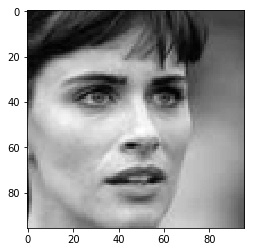

In [0]:
# Print a sample X image from the above data (0 is black, 1 is white)
#img = train_X[0].reshape(96,96)[:,::-1]
img = train_X[0].reshape(96,96)
plt.imshow(img, cmap='gray') 

In [0]:
# Print a sample of y label data. x,y = 0,0 is the center of the image.
keypoints_1 = train_y[0:1,:]
print(keypoints_1,keypoints_1.shape, type(keypoints_1))

[[ 0.261807   -0.20208012 -0.34046057 -0.20353137  0.13390376 -0.17920847
   0.39397693 -0.18342675 -0.22617969 -0.16135813 -0.5313947  -0.15987785
   0.11421517 -0.31416225  0.4764021  -0.3693298  -0.10285714 -0.34354496
  -0.6637912  -0.31978694  0.1138322   0.21350466  0.2699293   0.55108494
  -0.2746109   0.5821255   0.04251724  0.51590264  0.02736945  0.60252357]] (1, 30) <class 'numpy.ndarray'>


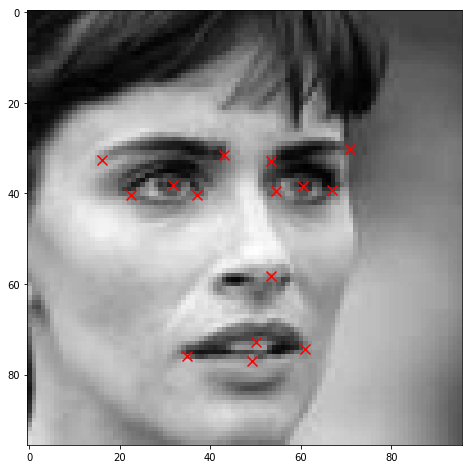

In [0]:
# print the sample image with the training 'labels' - keypoint indices marked on image.
# process y data into 2 columns - first is x and second is y for plotting points
keypoints_2 = keypoints_1.reshape(15,2)

# we normalized the keypoint locations, but to plot we need to 'un-normalize'
keypoints_3 = keypoints_2*48 + 48

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)
plt.show()

# Flipping images and labels for extra training data

In [0]:
# create a function to flip images and labels

def flip_image(img_array, img_labels):
  flipped_images = np.empty(img_array.shape)
  for i in range(len(img_array)):
    img_array1 = img_array.copy()
    # reshape the array to 96x96 shape, flip the row values, 
    # then reshape back to the original 1x9216 shape
    arr = img_array1[i].reshape(96,96)[:,::-1].reshape(1, 9216)
    # add the flipped array to flipped images
    flipped_images[i] = arr
  
  flipped_labels = np.empty(img_labels.shape)
  for i in range(len(img_labels)):
    img_labels1 = img_labels.copy()
    # reshape the label array to a 15x2 array
    # 0th column will be the x-coordinates of the labels
    # multiply the x-coordinates by -1 to flip them horizontally
    label = img_labels1[i].reshape(15,2)
    label[:,0] *= -1
    label = label.reshape(15,2)
    # reshape back to the original shape
    label = label.reshape(1, 30)
    
    ####Yue: we need also to flip right eye label to left eye label, otherwise the model accuracy will decrease
    flip_indices = {0:2, 2:0, 1:3, 3:1, 4:8, 8:4, 5:9, 9:5, 6:10, 10:6, 7:11, 11:7, 12:16, 16:12, 13: 17, 17:13, 14:18, 18:14, 15:19, 19:15, 22:24, 24:22, 23:25, 25:23, 20:20, 21:21, 26:26, 27:27, 28:28, 29:29}
    label1 = np.empty(label.shape)
    for j in range(30):
      # print(flip_indices[j])
      label1[:,j] = label[:,flip_indices[j]]
    # add the flipped label to flipped labels array
    flipped_labels[i] = label1  
    
  
  return flipped_images, flipped_labels
    

In [0]:
train_X_flipped, train_y_flipped = flip_image(train_X, train_y)

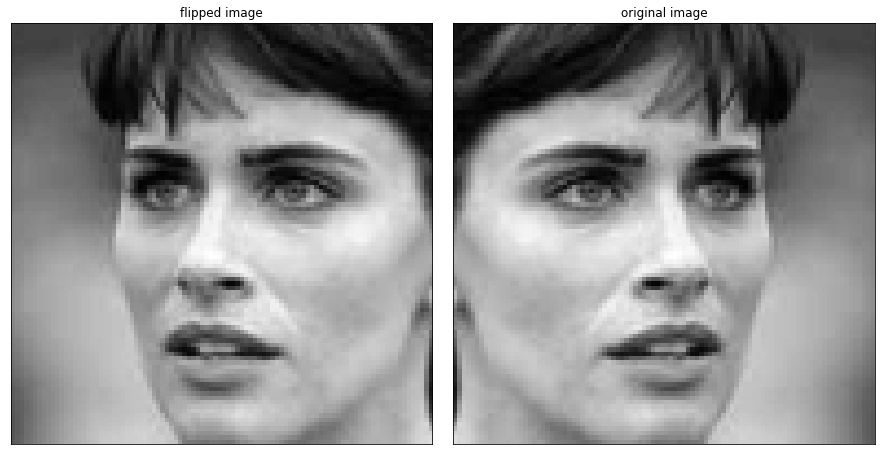

In [0]:
img_flipped = train_X_flipped[0].reshape(96,96)
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

axis = fig.add_subplot(2, 2, 1, xticks = [], yticks = [], title='flipped image')
axis.imshow(img_flipped, cmap='gray') 
axis = fig.add_subplot(2, 2, 2, xticks = [], yticks = [], title='original image')
axis.imshow(train_X[0].reshape(96,96),cmap='gray')

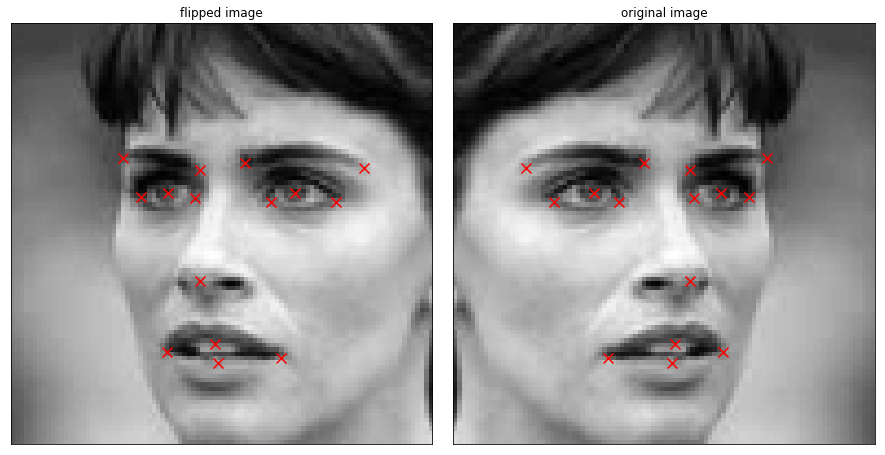

In [0]:
keypoints_1_flipped = train_y_flipped[0:1,:]
keypoints_2_flipped = keypoints_1_flipped.reshape(15,2)
keypoints_3_flipped = keypoints_2_flipped*48 + 48

# Plot
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

axis = fig.add_subplot(2, 2, 1, xticks = [], yticks = [], title='flipped image')
axis.imshow(img_flipped,cmap='gray')
axis.scatter(keypoints_3_flipped[:,0],keypoints_3_flipped[:,1],c='r',marker="x", s=100)


axis = fig.add_subplot(2, 2, 2, xticks = [], yticks = [],  title='original image')
axis.imshow(train_X[0].reshape(96,96),cmap='gray')
axis.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)


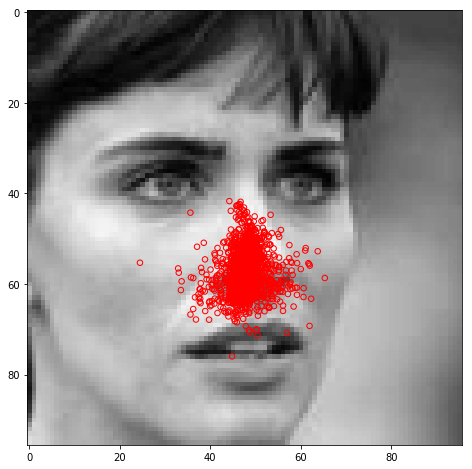

In [0]:
# Look at variability in training data using nose tip - element 10 (x is feature 20 and y is feature 21 in the train_y matrix- indexed from 0)
# define nose data:
nose = train_y[:,20:22]*48+48
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(nose[:,0],nose[:,1],edgecolors='r',marker="o",facecolors='none', s=30)
plt.show()

# Blur and accentuate images for better feature classification

In [0]:
def accentuate_image(img_arr):
  '''
  Function to bring out the main features of the image
  Ideally this helps the models identify the objects to be labeled
  '''
  # take the very dark pixels and make them fully black
  img = np.around(img_arr, 2)
  img = np.where(img <= 0.3, 0, img)
  # make the non-dark pixels a little brighter
  img = np.where((img > 0.3) & (img <= 0.9), 
                      img + 0.1, img)
  return img

def Gaussian_blur(image):
  """Blur each image by Gaussian blur with kernel"""
  # create kernel
  kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])
  # weighted kenel with sum of kernel
  kernel = kernel / np.sum(kernel)

  image = image.reshape(96,96)
  # create a numpy array with 1 on the boarder of matrix and others are zero
  boarder_image = np.ones(image.shape)
  boarder_image[1:-1,1:-1] = 0
  # initialize the blurred image matrix
  image_blur = np.zeros(image.shape)

  # smoothed value of a pixel by a weighted combination of the original value and the 8 neighboring values
  for i in list(range(1,95,1)):
      for j in list(range(1,95,1)):
          image_blur[i][j] = (image[i-1][j-1]*kernel[0][0]) + (image[i-1][j]*kernel[0][1]) + (image[i-1][j+1]*kernel[0][2])
          + (image[i][j-1]*kernel[1][0]) + (image[i][j]*kernel[1][1]) + (image[i][j+1]*kernel[1][2])
          + (image[i+1][j-1]*kernel[2][0]) + (image[i+1][j]*kernel[2][1]) + (image[i+1][j+1]*kernel[2][2])

  # Keep value on the borader of image matrix and update other value by a weighted combination of the original value and the 8 neighboring values        
  return (image_blur + image*boarder_image).reshape(9216,)
  
def Blur_image(data):
  """Blur data with Gaussian Blur"""
  blur_image1 = np.empty(data.shape)
  for k in range(data.shape[0]):
    blur_image1[k,:] = Gaussian_blur(data[k,:])
  return blur_image1

Text(0.5, 0.98, 'Original Image')

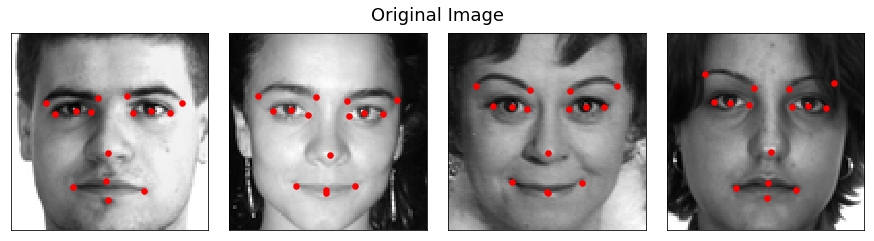

In [0]:
def plot_sample(img_arr, img_labels = np.nan, pred_labels = np.nan):
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(
  left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05)

  if len(img_arr) > 8:
    sample_count = 8
  else:
    sample_count = len(img_arr)

  for i in range(sample_count):
    axis = fig.add_subplot(4, 4, i + 1, xticks = [], yticks = [])
    img = img_arr[i].reshape(96, 96)
    axis.imshow(img, cmap='gray')
    
    if np.all(np.isfinite(img_labels)):
      axis.scatter(img_labels[i][0::2] * 48 + 48, img_labels[i][1::2] * 48 + 48, 
                   marker='o', s=30, c='red', label = 'y actual')
    if np.all(np.isfinite(pred_labels)):
      axis.scatter(pred_labels[i][0::2] * 48 + 48, pred_labels[i][1::2] * 48 + 48, 
                   marker='x', s=30, c='blue', label = 'y predicted')


plot_sample(dev_X[0:4], dev_y[0:4])

plt.suptitle('Original Image', fontsize=18)


Text(0.5, 0.98, 'Accentuated Image')

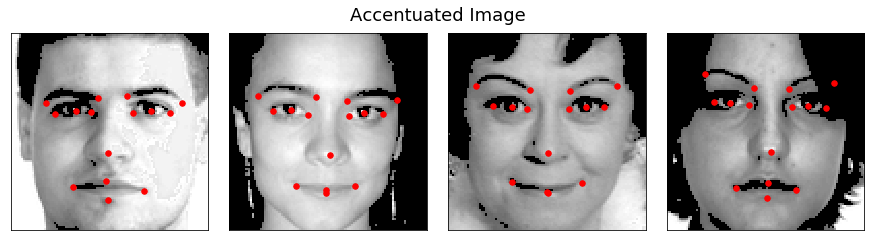

In [0]:
test = accentuate_image(dev_X)

plot_sample(test[0:4], dev_y[0:4])

plt.suptitle('Accentuated Image', fontsize=18)


Text(0.5, 0.98, 'Blurred Image')

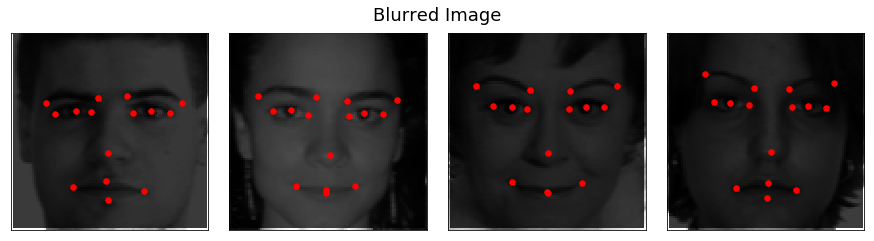

In [0]:
test_blur = Blur_image(dev_X)

plot_sample(test_blur[0:4], dev_y[0:4])

plt.suptitle('Blurred Image', fontsize=18)

In [0]:
# Combine original image with flipped image
moar_data1 = np.append(train_X, train_X_flipped, axis=0)


moar_labels1 = np.append(train_y, train_y_flipped, axis=0)


# shuffle the combined train data
s=np.arange(moar_data1.shape[0])
np.random.shuffle(s)

moar_data = moar_data1[s]
moar_labels = moar_labels1[s]


In [0]:

# Accentrated Image
Accentrated_train_X = accentuate_image(moar_data) # accentrated flipped and original image belongs to train data
Accentrated_dev_X = accentuate_image(dev_X) # accentrated image for dev data

# Blur Image
Blur_train_X = Blur_image(moar_data) # Blur flipped and original image belongs to train data
Blur_dev_X = Blur_image(dev_X) # Blur image for dev data

DO Some Stats on the labels - and look at relative functions of labels with each other - which are correlated, can can we use this to our advantage for the data where labels are missing?

- One approach is to ignore the error in a CNN on the final output layer per this paper: [https://shangyuezhu.github.io/shangyuezhu.github.io/images/Convolutional_Neural_Network.pdf]

- 

- 

In [0]:
# Code Laura Misc - this from https://medium.com/diving-in-deep/facial-keypoints-detection-with-pytorch-86bac79141e4
missing_any_data = np.isnan[moar_data]
idxs = np.random.choice(missing_any_data.index, 4)
show_images(moar_data, idxs)


TypeError: ignored

# 6. kNN Classification & Scoring

Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

#each label output is a regression value as opposed to a classifier
#find optimal k
#Use GridSearchCV
param = {'n_neighbors': [2,3,4,5,6,7,8,9]}
knn_regressor = KNeighborsRegressor()
# Yue: Solve Warning: Call metrics.r2_score to solve warning: https://colab.research.google.com/drive/1a78qg46qN8_D_n3mQAS_MFGbM-mfyMAF#scrollTo=b3QpFdPjG9Tm
score_method = make_scorer(r2_score)
knn_search = GridSearchCV(knn_regressor, param, cv=5, scoring=score_method)
knn_search.fit(train_X, train_y)
best_k = knn_search.best_params_  
optimal_k = knn_search.best_params_['n_neighbors']
print("optimal k: ", optimal_k)

#optimal k:5
#predict on the dev set
knn=KNeighborsRegressor(n_neighbors = optimal_k)
knn.fit(train_X, train_y)
dev_predict_label= knn.predict(dev_X)

print("RMSE of dev data: %.2f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))
print('coefficient of determination R^2: ', r2_score(dev_y, dev_predict_label))

optimal k:  5
RMSE of dev data: 0.05
coefficient of determination R^2:  0.30926968612444733


In [0]:
#how each individual label performed 
#Yue: Add R2 for comparison
label_names = list(pd.DataFrame(pd.read_csv(filepath + 'training.csv')).columns)[:-1]
pd.DataFrame({'RMSE':np.sqrt(mean_squared_error(dev_y, dev_predict_label, multioutput='raw_values')),'R2':r2_score(dev_y, dev_predict_label, multioutput='raw_values')}, 
              index=label_names).sort_values('RMSE', ascending=False)

,RMSE,R2
mouth_center_bottom_lip_y,0.084184,0.334808
mouth_left_corner_y,0.071761,0.380095
mouth_right_corner_y,0.069653,0.339850
left_eyebrow_outer_end_y,0.066864,0.154398
mouth_center_top_lip_y,0.065722,0.545974
nose_tip_y,0.062404,0.527197
mouth_left_corner_x,0.062389,0.251210
right_eyebrow_outer_end_y,0.060539,0.347900
mouth_right_corner_x,0.059196,0.281496
right_eyebrow_outer_end_x,0.058941,0.309494


*Comment on kNN*
For RMSE, the closer the value is to '0' the better the prediction, so there are some very good values in the above predictions and some very bad ones.

# 8. Logistic Regression Classification & Scoring
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

### Try number 1, using standard LinearRegression model

RMSE for each label
left_eye_center_x : 0.76285034
left_eye_center_y : 0.035981543
right_eye_center_x : 0.76687336
right_eye_center_y : 0.03592273
left_eye_inner_corner_x : 0.4748158
left_eye_inner_corner_y : 0.033111088
left_eye_outer_corner_x : 1.0630167
left_eye_outer_corner_y : 0.04115612
right_eye_inner_corner_x : 0.47730058
right_eye_inner_corner_y : 0.03604317
right_eye_outer_corner_x : 1.0729245
right_eye_outer_corner_y : 0.041999083
left_eyebrow_inner_end_x : 0.35182673
left_eyebrow_inner_end_y : 0.053150058
left_eyebrow_outer_end_x : 1.3152401
left_eyebrow_outer_end_y : 0.068907544
right_eyebrow_inner_end_x : 0.3772231
right_eyebrow_inner_end_y : 0.05612929
right_eyebrow_outer_end_x : 1.3495213
right_eyebrow_outer_end_y : 0.06986443
nose_tip_x : 0.11886577
nose_tip_y : 0.07533058
mouth_left_corner_x : 0.6645476
mouth_left_corner_y : 0.073617145
mouth_right_corner_x : 0.6351235
mouth_right_corner_y : 0.072772324
mouth_center_top_lip_x : 0.09890705
mouth_center_top_lip_y : 0.08

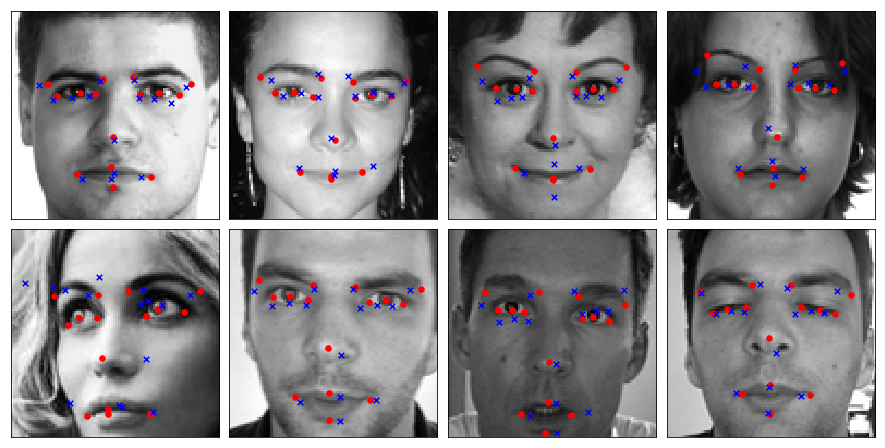

In [0]:
# Instantiate a LR model with the LogisticRegression class

# Set the multi_class parameter to 'multinomial' as our outputs are not
# binomial, hence one-vs-rest will not work as well

# In order to use multinomial option, we need a non "liblinear" solver
# Available solvers for multinomial: ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

lr_mod = LinearRegression()

# List out all of the label names
label_names = list(pd.DataFrame(pd.read_csv(filepath + 'training.csv')).columns)[:-1]

# fit the Linear Regression model
lr_mod.fit(train_X, train_y)
# and predict the labels
lr_pred = lr_mod.predict(dev_X)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, lr_pred, multioutput = 'raw_values'))

print('RMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(dev_X[0:8], dev_y[0:8], lr_pred[0:8])

### Now try with accentuated images

RMSE for each label
left_eye_center_x : 0.7630994
left_eye_center_y : 0.03155015
right_eye_center_x : 0.7668822
right_eye_center_y : 0.03423513
left_eye_inner_corner_x : 0.47205573
left_eye_inner_corner_y : 0.031024972
left_eye_outer_corner_x : 1.0627121
left_eye_outer_corner_y : 0.03602653
right_eye_inner_corner_x : 0.4766205
right_eye_inner_corner_y : 0.03286512
right_eye_outer_corner_x : 1.0744157
right_eye_outer_corner_y : 0.040343605
left_eyebrow_inner_end_x : 0.35111323
left_eyebrow_inner_end_y : 0.044999056
left_eyebrow_outer_end_x : 1.3156613
left_eyebrow_outer_end_y : 0.05890179
right_eyebrow_inner_end_x : 0.3787256
right_eyebrow_inner_end_y : 0.051060513
right_eyebrow_outer_end_x : 1.3495967
right_eyebrow_outer_end_y : 0.063595854
nose_tip_x : 0.11454298
nose_tip_y : 0.06531996
mouth_left_corner_x : 0.66413254
mouth_left_corner_y : 0.06938438
mouth_right_corner_x : 0.63529366
mouth_right_corner_y : 0.06563803
mouth_center_top_lip_x : 0.09859956
mouth_center_top_lip_y : 0.0695

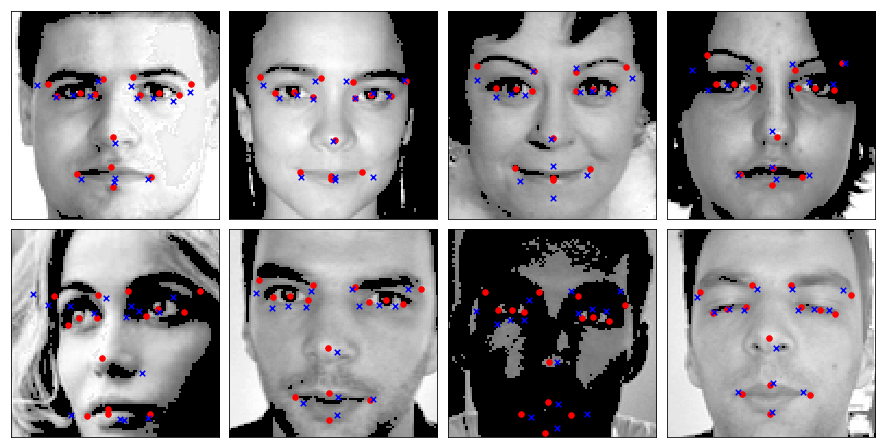

In [0]:
lr_mod = LinearRegression()

# fit the Linear Regression model
preprocessed_train = accentuate_image(train_X)
lr_mod.fit(preprocessed_train, train_y)
# and predict the labels
preprocessed_dev = accentuate_image(dev_X)
lr_pred = lr_mod.predict(preprocessed_dev)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, lr_pred, multioutput = 'raw_values'))

print('RMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(preprocessed_dev[0:8], dev_y[0:8], lr_pred[0:8])

### Add flipped images

In [0]:
# Move it to section:Blur and accentuate images for better feature classification. So that it could be applied to other model
#moar_data = np.append(train_X, train_X_flipped, axis=0)
#moar_data.shape

#moar_labels = np.append(train_y, train_y_flipped, axis=0)
#moar_labels.shape

(3684, 30)

RMSE for each label
left_eye_center_x : 0.7615416483170999
left_eye_center_y : 0.0562964342374345
right_eye_center_x : 0.7640652267017186
right_eye_center_y : 0.04954833259433652
left_eye_inner_corner_x : 0.46976535895675114
left_eye_inner_corner_y : 0.04531304605535038
left_eye_outer_corner_x : 1.0596237304883884
left_eye_outer_corner_y : 0.06802938740966852
right_eye_inner_corner_x : 0.4750455004858896
right_eye_inner_corner_y : 0.041968430649143997
right_eye_outer_corner_x : 1.0724286088988562
right_eye_outer_corner_y : 0.06472453067456055
left_eyebrow_inner_end_x : 0.34993136848960893
left_eyebrow_inner_end_y : 0.05979848428756265
left_eyebrow_outer_end_x : 1.3127216998172055
left_eyebrow_outer_end_y : 0.09468655230799171
right_eyebrow_inner_end_x : 0.37779347544414993
right_eyebrow_inner_end_y : 0.0598738552797665
right_eyebrow_outer_end_x : 1.3462812709962275
right_eyebrow_outer_end_y : 0.09020658146355809
nose_tip_x : 0.11082099877934905
nose_tip_y : 0.08496422116340165
mouth_le

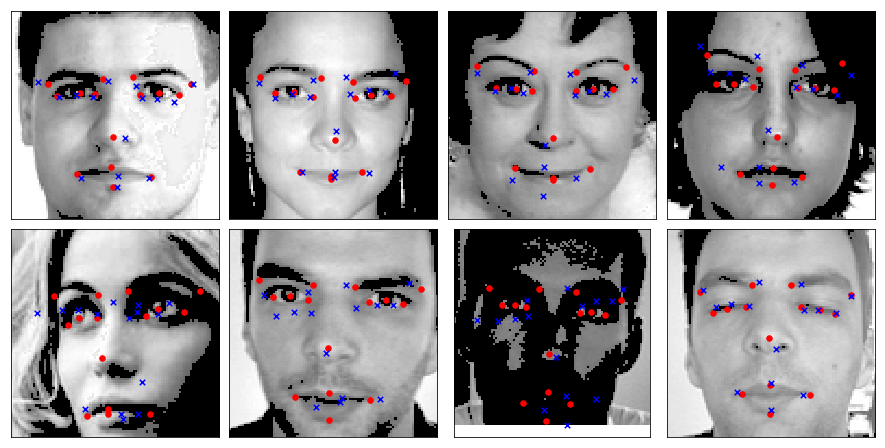

In [0]:
# with MOAR DATA
# RMSE looks worse with the flipped images... 
# might have to consider other approaches

lr_mod = LinearRegression()

lr_mod.fit(accentuate_image(moar_data), moar_labels)
# and predict the labels
lr_pred = lr_mod.predict(accentuate_image(dev_X))

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, lr_pred, multioutput = 'raw_values'))

print('RMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(accentuate_image(dev_X[0:8]), dev_y[0:8], lr_pred[0:8])

### Add labels to incomplete training data

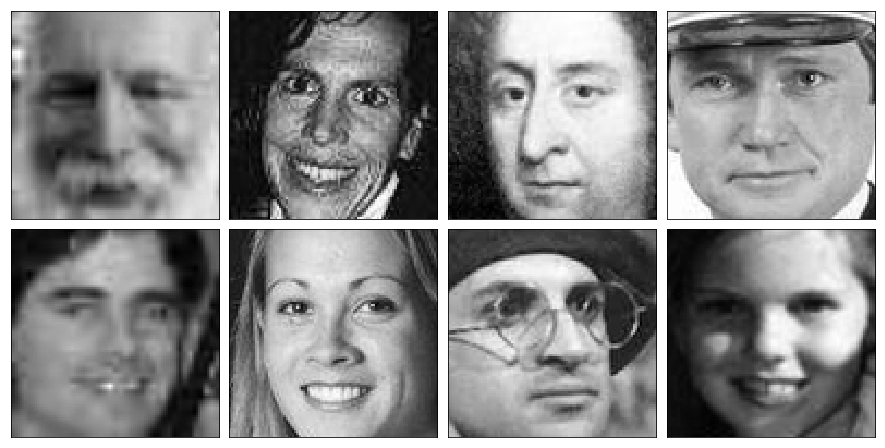

In [0]:
plot_sample(incomplete_train_X[0:8], incomplete_train_y[0:8])

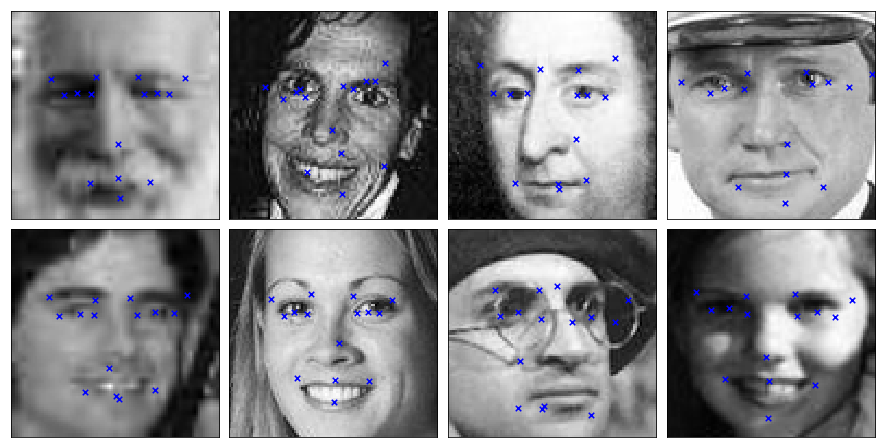

In [0]:
lr_mod = LinearRegression()

lr_mod.fit(train_X, train_y)
# and predict the labels
lr_pred = lr_mod.predict(incomplete_train_X)

# No need for RMSE since these images have missing/incomplete/no labels


plot_sample(incomplete_train_X[0:8], np.nan, lr_pred[0:8])

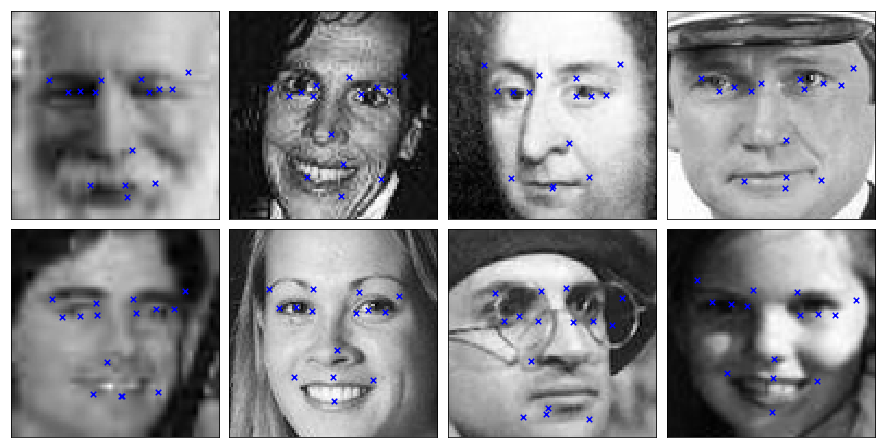

In [0]:
lr_mod = LinearRegression()

lr_mod.fit(accentuate_image(train_X), train_y)
# and predict the labels
lr_pred = lr_mod.predict(accentuate_image(incomplete_train_X))

# No need for RMSE since these images have missing/incomplete/no labels


plot_sample(incomplete_train_X[0:8], np.nan, lr_pred[0:8])

# 7. Multilayer Nueral Network
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

In [0]:
def plot_example(x, y, axis, predicted_label=np.nan):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter((y.reshape(15,2) * 48 + 48)[:,0], (y.reshape(15,2) * 48 + 48)[:,1], marker='o', s=30, c='red')
    
    if np.all(np.isfinite(predicted_label)):
            plt.scatter((predicted_label.reshape(15,2) * 48 + 48)[:,0], (predicted_label.reshape(15,2) * 48 + 48)[:,1], c='blue', marker='x', label='predicted')

    return

In [0]:
def score(y,y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

## Part 1: Single Layer Neural Network (Perceptron)
### Following methodology is applied to improve performance of single layer neural network:


*   Learning rate: 0.01 and 0.001
*   Activation Function: linear regression and tanh function  (The sigmod and softmax doesn't work for this study, because the keypoint pairs range from -1 to 1, but the predicted labels only ranges from 0 to 1 with sigmod activation function)
*   Gradient Descent: batch, stochastic, and mini-batch 





### Part 1.1-1 Single Layer Neural Network with Tanh Activation Function (Try 1)


*   model: single layer neural network with tanh activation function
*   cost function: RMSE
*   Objective: minimize RMSE
*   Methodology: batch gradient descent
     * Learning Rate: 0.01



In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf


## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X = T.matrix()
Y = T.matrix()

# Softmax model is applied for multiple outputs logistic regression model
def model(X, w):
    #return T.nnet.softmax(T.dot(X, w))
    return T.tanh(T.dot(X, w))
    #return T.dot(X,w)
    #return T.nnet.rule(T.dot(X, w))

y_hat = model(X, w)

## (3) Cost function
cost = T.sqrt(T.mean((Y - y_hat)**2))

## (4) Objective (and solver)
alpha = 0.01 # Learning Rate
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
predict = theano.function(inputs=[X], outputs=y_hat, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))
        
    print('train time = ', trainTime)

    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()

gradientDescent(100)


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
W0802 18:47:43.339715 139912980838272 blas.py:433] We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


The above Cost vs. Number of Epochs plot shows that the cost stop decreasing as it reaches 0.25 with 10 epochs. The way to further reduce the cost and improve model accuracy is to try different learning rate. 

####Part 1.1-2 Single Layer Neural Network with Tanh Activation Function (Try 2)
* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: batch gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.5516719160162403)
RMSE (2, 0.5158271090142892)
RMSE (3, 0.47810068275100176)
RMSE (4, 0.4385725794233838)
RMSE (5, 0.39750513799647164)
RMSE (6, 0.35582254633721927)
RMSE (7, 0.3154870597629678)
RMSE (8, 0.2791064668939546)
RMSE (9, 0.2488807890474976)
RMSE (10, 0.225759874549837)
RMSE (11, 0.20935465236086467)
RMSE (12, 0.19841611324832398)
RMSE (13, 0.19141860335039246)
RMSE (14, 0.18699228985215038)
RMSE (15, 0.18413111914659044)
RMSE (16, 0.18219367355002455)
RMSE (17, 0.1808036332120334)
RMSE (18, 0.17974735689697582)
RMSE (19, 0.17890316905667125)
RMSE (20, 0.1781999354603316)
RMSE (21, 0.17759442030265146)
RMSE (22, 0.17705916636782104)
RMSE (23, 0.17657596876026918)
RMSE (24, 0.17613228138237796)
RMSE (25, 0.175719172648327)
RMSE (26, 0.17533011652172711)
RMSE (27, 0.1749602472230116)
RMSE (28, 0.17460588040633404)
RMSE (29, 0.1742641934208558)
RMSE (30, 0.17393300435661355)
RMSE (31, 0.17361061484773174)
RMSE (32, 0.17329569554500562)
RMSE (33, 0.17298720109011362)


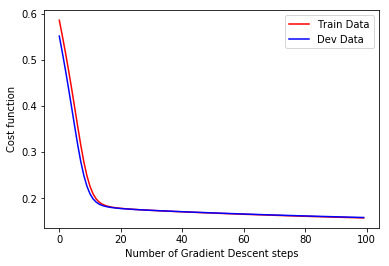

In [0]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X1 = T.matrix()
Y1 = T.matrix()

# Softmax model is applied for multiple outputs logistic regression model
def model1(X1, w1): 
    return T.tanh(T.dot(X1, w1))
    
    
y_hat1 = model1(X1, w1)

## (3) Cost function
cost1 = T.sqrt(T.mean((Y1 - y_hat1)**2))

## (4) Objective (and solver)
alpha1 = 0.001 # Learning Rate
gradient1 = T.grad(cost=cost1, wrt=w1) 
update1 = [[w1, w1 - gradient1 * alpha1]] 
train1 = theano.function(inputs=[X1, Y1], outputs=cost1, updates=update1, allow_input_downcast=True) # computes cost, then runs update
predict1 = theano.function(inputs=[X1], outputs=y_hat1, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost1 = train1(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost1)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict1(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))
        
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()

gradientDescent(100)


The above Cost vs. Number of Epochs plot shows that the cost is significantly reduced to 0.15 with smaller learning rate of 0.001. With smaller learning rate, the curve becomes more smooth and approaches local minimization step by step. With proper learning rate, next step is to study the activation funcation.

#### Part 1.2 Single Layer Neural Network with linear regression 
* model: single layer neural network with linear regression
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: batch gradient descent
    * Learning Rate: 0.001

RMSE (1, 0.5620219059795434)
RMSE (2, 0.49783247311634904)
RMSE (3, 0.43683699518891755)
RMSE (4, 0.3802608339484512)
RMSE (5, 0.32977144894821847)
RMSE (6, 0.2873937803697367)
RMSE (7, 0.25498174016209757)
RMSE (8, 0.2331296605808411)
RMSE (9, 0.22033123989280526)
RMSE (10, 0.21364979127862754)
RMSE (11, 0.2103233565302006)
RMSE (12, 0.20859031282057933)
RMSE (13, 0.2075538155356682)
RMSE (14, 0.2068089811012871)
RMSE (15, 0.2061839978745875)
RMSE (16, 0.20560853566454113)
RMSE (17, 0.20505462980005043)
RMSE (18, 0.2045115398283201)
RMSE (19, 0.20397535726714067)
RMSE (20, 0.20344479604765492)
RMSE (21, 0.2029195235008319)
RMSE (22, 0.20239951833763736)
RMSE (23, 0.2018848358791957)
RMSE (24, 0.20137553028396946)
RMSE (25, 0.2008716344884226)
RMSE (26, 0.20037315950474596)
RMSE (27, 0.19988009890580885)
RMSE (28, 0.1993924336909051)
RMSE (29, 0.1989101362009777)
RMSE (30, 0.19843317294310836)
RMSE (31, 0.19796150652379454)
RMSE (32, 0.19749509693564987)
RMSE (33, 0.1970339024010054)
R

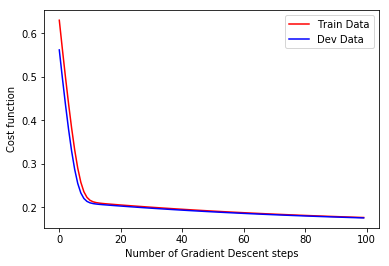

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf

## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w2 = theano.shared(np.asarray((np.random.randn(*(num_features+1, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X2 = T.matrix()
Y2 = T.matrix()

# Softmax model is applied for multiple outputs logistic regression model
def model2(X2, w2):
    return T.dot(X2, w2[1:,:])+w2[0,:]
    
y_hat2 = model2(X2, w2)

## (3) Cost function
cost2 = T.sqrt(T.mean((Y2 - y_hat2)**2))

## (4) Objective (and solver)
alpha2 = 0.001 # Learning Rate
gradient2 = T.grad(cost=cost2, wrt=w2) 
update2 = [[w2, w2 - gradient2 * alpha2]] 
train2 = theano.function(inputs=[X2, Y2], outputs=cost2, updates=update2, allow_input_downcast=True) # computes cost, then runs update
predict2 = theano.function(inputs=[X2], outputs=y_hat2, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost2 = train2(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost2)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict2(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))
        # print('accuracy = ', (i+1, r2_score(dev_y, predict(dev_X)))) 
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescent(100)


The above Cost vs. Number of Epochs plot shows that the performance of linear regression is comparable to that of tanh activation function. The RMSE is around 0.17 with 100 Epochs. 

#### Part 1.3 Single Layer Neural Network with tanh activation function and stochastic gradient descent
* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: stochastic gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.12247484482665984)
RMSE (2, 0.11581342495706266)
RMSE (3, 0.11460154992041911)
RMSE (4, 0.11449374043407139)
RMSE (5, 0.11431723559920638)
RMSE (6, 0.11395757670468895)
RMSE (7, 0.11348637827530911)
RMSE (8, 0.1129636939095327)
RMSE (9, 0.11242236060986387)
RMSE (10, 0.11187783028860411)
RMSE (11, 0.11133624470476897)
RMSE (12, 0.11079928663987741)
RMSE (13, 0.11026685838024324)
RMSE (14, 0.10973842697088548)
RMSE (15, 0.10921364428697843)
RMSE (16, 0.10869263098607264)
RMSE (17, 0.10817610679636241)
RMSE (18, 0.107665414457673)
RMSE (19, 0.10716243701702552)
RMSE (20, 0.10666941737265559)
RMSE (21, 0.10618871447762339)
RMSE (22, 0.10572254641533448)
RMSE (23, 0.10527276878231248)
RMSE (24, 0.10484072151683911)
RMSE (25, 0.1044271569621339)
RMSE (26, 0.10403224412613614)
RMSE (27, 0.10365563295637084)
RMSE (28, 0.10329655851485094)
RMSE (29, 0.10295396634068121)
RMSE (30, 0.10262664440192903)
RMSE (31, 0.10231335104530541)
RMSE (32, 0.10201290688450555)
RMSE (33, 0.101603346

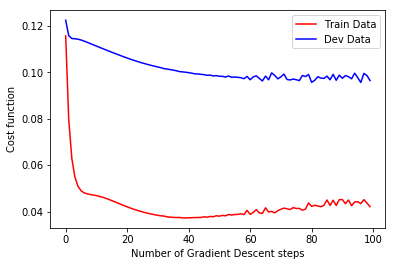

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf

## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w3 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X3 = T.matrix()
Y3 = T.matrix()

# Softmax model is applied for multiple outputs logistic regression model
def model3(X3, w3): 
    return T.tanh(T.dot(X3, w3))
    
    
y_hat3 = model3(X3, w3)

## (3) Cost function
cost3 = T.sqrt(T.mean((Y3 - y_hat3)**2))

## (4) Objective (and solver)
alpha3 = 0.001 # Learning Rate
gradient3 = T.grad(cost=cost3, wrt=w3) 
update3 = [[w3, w3 - gradient3 * alpha3]] 
train3 = theano.function(inputs=[X3, Y3], outputs=cost3, updates=update3, allow_input_downcast=True) # computes cost, then runs update
predict3 = theano.function(inputs=[X3], outputs=y_hat3, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.



miniBatchSize = 1 
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost3 = train3(train_X[start:end], train_y[start:end])
        cost_vec.append(cost3)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict3(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescentStochastic(100)


With stochastic gradient descent, the RMSE is further reduced. The RMSE for dev data is 0.096 with 100 Epochs. Because update are more frequet with stochasitc gradient descent. For each epoch, the weights are updated 1842 times. Due to this reason, the computation time is much longer. Because the data is updated more frequently, the cost  fluctuates significantly with each epochs. In order to shorten computation time and keep accuracy, the mini batch is applied for simulation below.

### Part 1.4 Single Layer Neural Network with tanh activation function and mini gradient descent
* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.14497544880021138)
RMSE (2, 0.1331112413756185)
RMSE (3, 0.12657422710112098)
RMSE (4, 0.12203712294087651)
RMSE (5, 0.11858628956982192)
RMSE (6, 0.115817853162521)
RMSE (7, 0.1135158974710224)
RMSE (8, 0.11155306259664133)
RMSE (9, 0.10984850981454634)
RMSE (10, 0.10834766171329614)
RMSE (11, 0.10701174229364503)
RMSE (12, 0.10581205788076481)
RMSE (13, 0.10472668565607116)
RMSE (14, 0.10373844742056322)
RMSE (15, 0.10283360719932194)
RMSE (16, 0.10200099850277895)
RMSE (17, 0.10123141888053071)
RMSE (18, 0.10051719747763671)
RMSE (19, 0.09985187831298573)
RMSE (20, 0.09922998315397354)
RMSE (21, 0.09864683049420506)
RMSE (22, 0.09809839495841362)
RMSE (23, 0.09758119643659785)
RMSE (24, 0.09709221149395163)
RMSE (25, 0.09662880176111348)
RMSE (26, 0.09618865547128747)
RMSE (27, 0.09576973931904771)
RMSE (28, 0.09537025852320802)
RMSE (29, 0.09498862348133379)
RMSE (30, 0.09462342177034881)
RMSE (31, 0.0942733945185269)
RMSE (32, 0.09393741637724787)
RMSE (33, 0.0936144784

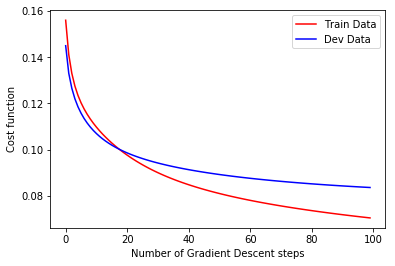

In [0]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w4 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X4 = T.matrix()
Y4 = T.matrix()

# Softmax model is applied for multiple outputs logistic regression model
def model4(X4, w4): 
    return T.tanh(T.dot(X4, w4))
    
    
y_hat4 = model4(X4, w4)

## (3) Cost function
cost4 = T.sqrt(T.mean((Y4 - y_hat4)**2))

## (4) Objective (and solver)
alpha4 = 0.001 # Learning Rate
gradient4 = T.grad(cost=cost4, wrt=w4) 
update4 = [[w4, w4 - gradient4 * alpha4]] 
train4 = theano.function(inputs=[X4, Y4], outputs=cost4, updates=update4, allow_input_downcast=True) # computes cost, then runs update
predict4 = theano.function(inputs=[X4], outputs=y_hat4, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.



miniBatchSize = 10 
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost4 = train4(train_X[start:end], train_y[start:end])
        cost_vec.append(cost4)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE=np.sqrt(mean_squared_error(dev_y, predict4(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescentStochastic(100)





With mini-batch gradient descent, the RMSE is further reduced. The RMSE for dev data is 0.08 with 200 Epochs. Instead of updating weights with each training data and total 1840 updates in each epoch, the weights are updated with 10 training data in one group and total 184 updates in each epoch, which saves computation time and keep high accuracy.

In [0]:
 pd.DataFrame(np.sqrt(mean_squared_error(dev_y, predict4(dev_X), multioutput='raw_values')),columns=['RMSE'], index=dev_labels).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.111388
mouth_left_corner_y,0.105952
mouth_right_corner_y,0.103189
right_eyebrow_outer_end_y,0.101091
mouth_center_top_lip_y,0.099480
left_eyebrow_outer_end_y,0.097042
right_eyebrow_inner_end_y,0.096427
left_eyebrow_outer_end_x,0.092048
left_eye_outer_corner_x,0.091971
right_eyebrow_outer_end_x,0.090393


[[47, 0.025961894801766004], [192, 0.02674147750412293], [160, 0.027044033468703287], [23, 0.02798188956990143], [294, 0.02965172656103682]]


Text(0.5, 1.0, 'RMSE Distribution')

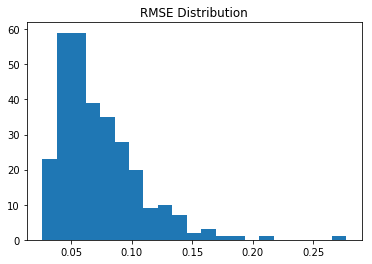

In [0]:
## RMSE by sample
RMSE_1 = []
dev_y_pred = predict4(dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1])
print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution')

47 0.025961894801766004
[0.7607843  0.75686276 0.7647059  ... 0.6862745  0.6901961  0.6901961 ]
192 0.02674147750412293
[0.6431373  0.654902   0.6901961  ... 0.1764706  0.13333334 0.07843138]
160 0.027044033468703287
[0.36862746 0.41960785 0.29803923 ... 0.54509807 0.5176471  0.5137255 ]
90 0.2774623541380115
11 0.21009636117279948
141 0.18812342595008802


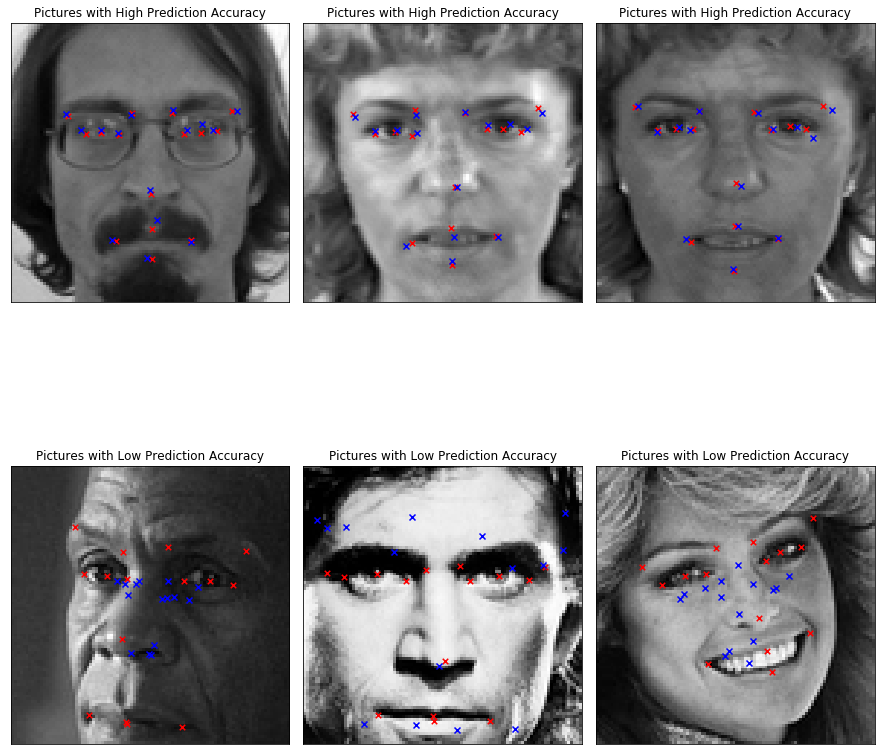

In [0]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    print(dev_X[RMSE_1[n-1][0]])
    plot_example(dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')
for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')

plt.show()


### Part I Conclusion: Single Layer Neural Network (Perceptron)
The conclusion of optimal model is :
*   Model: Single Layer Neural Network with Tanh Activation Function
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 100 (trade off between computation time and accuracy)
    
The performance of model:
*  The average RMSE for all keypoints is 0.08 for develop data
*  Compared with linear regression, RMSE for each keypoint pair does significantly increase
*  Based on histogram of RMSE for all develop data, the RMSE of prediction is 0.05 for most develop data.
*  The image with highest and lowest RMSE are shown above. It is obvious that when the picture is blurring, the model performance will decrease

> Indented block



    






## Part 2: Multilayer Neural Network
### Following methodology is applied to improve performance of multi-layer neural network:
Use the optimal learning rate, activation function and gradient descent method based on single-layer neural network
* Learning rate:  0.001
* Activation Function: tanh function (for output layer)
* Gradient Descent: mini-batch with batch size of 10

Following aspects will be test for better performance:
* number of hidden nodes: 600 and 800
* number of hidden layer: 1 and 3
* Activation Function: Rectifier Activation Function

### Part 2.1 Multi-Layer Neural Network with tanh activation function and mini gradient descent
* model: Multilayer layer neural network with tanh activation function
  * one hidden-layer
  * 600 hidden nodes
  * Activation Function: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

In [0]:
## (1) Parameters
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
numHiddenNodes = 600 
w5_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w5_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params5 = [w5_1, w5_2]


## (2) Model
X5 = T.matrix()
Y5 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model5(X5, w5_1, w5_2):
    return T.tanh(T.dot(T.tanh(T.dot(X5, w5_1)), w5_2))
y_hat5 = model5(X5, w5_1, w5_2)


## (3) Cost...same as logistic regression
cost5 = T.sqrt(T.mean((Y5 - y_hat5)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha5 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha5])
    return updates
update5 = backprop(cost5, params5)
train5 = theano.function(inputs=[X5, Y5], outputs=cost5, updates=update5, allow_input_downcast=True)
predict5 = theano.function(inputs=[X5], outputs=y_hat5, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost5 = train5(train_X[start:end], train_y[start:end])
        cost_vec.append(cost5)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict5(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(50)



RMSE (1, 0.5318900415109143)
RMSE (2, 0.5338433109657161)
RMSE (3, 0.5335663175424354)
RMSE (4, 0.5333219682581858)


KeyboardInterrupt: ignored

The RMSE is reduced to 0.06 from single layer to multi-layer neural network. By adding one hidden layer, the model performance is improved. Next step, we try to add more neural nodes in hidden layer or increase number of hidden layer.

### Part 2.2 Multi-Layer Neural Network with tanh activation function and mini gradient descent (Increase hidden nodes)
* model: Multilayer layer neural network with tanh activation function
  * one hidden-layer
  * increase  hidden nodes to 800
  * Activation Function: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.09132986581510731)
RMSE (2, 0.08793783558405005)
RMSE (3, 0.0850216001923132)
RMSE (4, 0.08238483631821363)
RMSE (5, 0.07996435246877985)
RMSE (6, 0.07773622817198494)
RMSE (7, 0.07569198658161459)
RMSE (8, 0.07382734296098825)
RMSE (9, 0.07213730132533344)
RMSE (10, 0.07061448998025366)
RMSE (11, 0.06924904533882291)
RMSE (12, 0.0680291470747298)
RMSE (13, 0.0669417580287589)
RMSE (14, 0.06597335384893285)
RMSE (15, 0.0651105419789013)
RMSE (16, 0.06434053090751621)
RMSE (17, 0.06365144653528595)
RMSE (18, 0.06303251316049038)
RMSE (19, 0.06247412627282755)
RMSE (20, 0.061967846322790045)
RMSE (21, 0.06150633991476607)
RMSE (22, 0.06108328993487559)
RMSE (23, 0.0606932907001022)
RMSE (24, 0.06033173929534637)
RMSE (25, 0.0599947302771638)
RMSE (26, 0.05967895793757715)
RMSE (27, 0.0593816282243935)
RMSE (28, 0.059100381024168404)
RMSE (29, 0.05883322264674748)
RMSE (30, 0.058578467850277496)
RMSE (31, 0.05833469049228432)
RMSE (32, 0.058100681798240454)
RMSE (33, 0.05787541

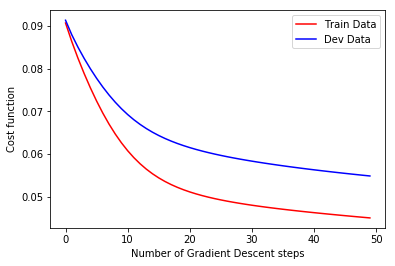

In [0]:
## (1) Parameters
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]

numHiddenNodes_high = 800 
w5_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes_high))*.01)))
w5_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels))*.01)))
params5 = [w5_1, w5_2]


## (2) Model
X5 = T.matrix()
Y5 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model5(X5, w5_1, w5_2):
    return T.tanh(T.dot(T.tanh(T.dot(X5, w5_1)), w5_2))
y_hat5 = model5(X5, w5_1, w5_2)


## (3) Cost...same as logistic regression
cost5 = T.sqrt(T.mean((Y5 - y_hat5)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha5 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha5])
    return updates
update5 = backprop(cost5, params5)
train5 = theano.function(inputs=[X5, Y5], outputs=cost5, updates=update5, allow_input_downcast=True)
predict5 = theano.function(inputs=[X5], outputs=y_hat5, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost5 = train5(train_X[start:end], train_y[start:end])
        cost_vec.append(cost5)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict5(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(50)






The model performance hasn't been improved by increasing number of hidden nodes, while the train time is longer. In order to save computational time. The following model will use 600 hidden nodes

### Part 2.3 Multi-Layer Neural Network with rectifier activation function in hidden layer and mini gradient descent 
The rectifier activation is considered, because the rectifier activated node continue to learn in the positive direction while  the learning will stop when tanh activated node approaches 1.
* model: Multilayer layer neural network with tanh activation function
  * one hidden-layer
  * 600 hidden nodes
  * Activation Function: tanh in output layer and rectifier function in hidden layer
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.10361186207179444)
RMSE (2, 0.10196030502668149)
RMSE (3, 0.10110829122775263)
RMSE (4, 0.10035056173624161)
RMSE (5, 0.09966594722201301)
RMSE (6, 0.09903583608471322)
RMSE (7, 0.09845168887038691)
RMSE (8, 0.09790461742575166)
RMSE (9, 0.09738480401159652)
RMSE (10, 0.0968905450387327)
RMSE (11, 0.09642043016538884)
RMSE (12, 0.09596820522535544)
RMSE (13, 0.09553487983290977)
RMSE (14, 0.0951176551466316)
RMSE (15, 0.09471341826590741)
RMSE (16, 0.0943208103510703)
RMSE (17, 0.093936861834582)
RMSE (18, 0.09356365401371353)
RMSE (19, 0.0931999843936646)
RMSE (20, 0.09284378391794135)
RMSE (21, 0.09249363580433094)
RMSE (22, 0.09214911561286324)
RMSE (23, 0.09180769451098146)
RMSE (24, 0.09147141980723805)
RMSE (25, 0.09113950468511915)
RMSE (26, 0.09081237018471804)
RMSE (27, 0.0904904742929092)
RMSE (28, 0.09017300448935434)
RMSE (29, 0.08985806615511355)
RMSE (30, 0.08954478905132354)
RMSE (31, 0.08923564535394089)
RMSE (32, 0.0889298393839044)
RMSE (33, 0.0886267313447

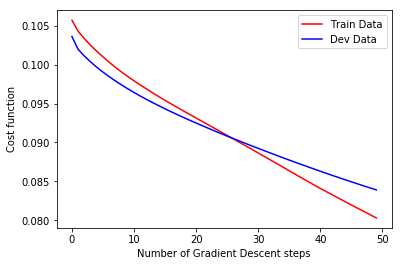

In [0]:
## (1) Parameters
numHiddenNodes = 600 
w6_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w6_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params6 = [w6_1, w6_2]


## (2) Model
X6 = T.matrix()
Y6 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model6(X6, w6_1, w6_2):
    return T.tanh(T.dot(T.nnet.relu(T.dot(X6, w6_1), 0), w6_2))
y_hat6 = model6(X6, w6_1, w6_2)


## (3) Cost...same as logistic regression
cost6 = T.sqrt(T.mean((Y6 - y_hat6)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha6 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha6])
    return updates
update6 = backprop(cost6, params6)
train6 = theano.function(inputs=[X6, Y6], outputs=cost6, updates=update6, allow_input_downcast=True)
predict6 = theano.function(inputs=[X6], outputs=y_hat6, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost6 = train6(train_X[start:end], train_y[start:end])
        cost_vec.append(cost6)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict6(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(50)




Compared with tanh function in hidden layer, there is no big improvement by using rectifier function in hidden layer

### Part 2.4 Multi-Layer Neural Network with tanh activation function and mini gradient descent (add hidden layers)
* model: Multilayer layer neural network with tanh activation function
  * three hidden-layer
  * 600 hidden nodes
  * Activation Function: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

RMSE (1, 0.2917659028244935)
RMSE (2, 0.1253988980386826)
RMSE (3, 0.08622638648177591)
RMSE (4, 0.0849471589047876)
RMSE (5, 0.08380092046238566)
RMSE (6, 0.08270875960459768)
RMSE (7, 0.08166850770760353)
RMSE (8, 0.08067816756589158)
RMSE (9, 0.07973543918653239)
RMSE (10, 0.0788378566404559)
RMSE (11, 0.07798290170221428)
RMSE (12, 0.07716808586707197)
RMSE (13, 0.07639100655506677)
RMSE (14, 0.07564938334084534)
RMSE (15, 0.07494107914577243)
RMSE (16, 0.07426411035555794)
RMSE (17, 0.07361664896027816)
RMSE (18, 0.07299701910578031)
RMSE (19, 0.07240368989476197)
RMSE (20, 0.07183526585478534)
RMSE (21, 0.07129047616073886)
RMSE (22, 0.07076816342475695)
RMSE (23, 0.07026727262461437)
RMSE (24, 0.06978684052698474)
RMSE (25, 0.06932598578273597)
RMSE (26, 0.06888389973886133)
RMSE (27, 0.06845983793093906)
RMSE (28, 0.06805311218660492)
RMSE (29, 0.06766308327204042)
RMSE (30, 0.06728915403468641)
RMSE (31, 0.06693076302279692)
RMSE (32, 0.06658737858678954)
RMSE (33, 0.066258493

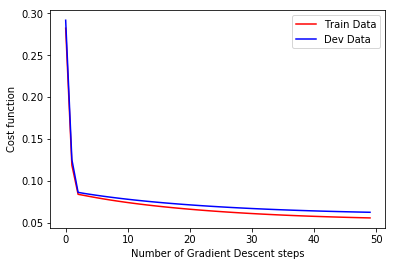

In [0]:
## (1) Parameters
numHiddenNodes = 600 
w7_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w7_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numHiddenNodes))*.01)))
w7_3 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params7 = [w7_1, w7_2,w7_3]


## (2) Model
X7 = T.matrix()
Y7 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model7(X7, w7_1, w7_2, w7_3):
    return T.dot(T.tanh(T.dot(T.tanh(T.dot(X7, w7_1)), w7_2)),w7_3)
y_hat7 = model7(X7, w7_1, w7_2, w7_3)


## (3) Cost...same as logistic regression
cost7 = T.sqrt(T.mean((Y7 - y_hat7)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha7 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha7])
    return updates
update7 = backprop(cost7, params7)
train7 = theano.function(inputs=[X7, Y7], outputs=cost7, updates=update7, allow_input_downcast=True)
predict7 = theano.function(inputs=[X7], outputs=y_hat7, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost7 = train7(train_X[start:end], train_y[start:end])
        cost_vec.append(cost7)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict7(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(50)


In [0]:
 pd.DataFrame(np.sqrt(mean_squared_error(dev_y, predict5(dev_X), multioutput='raw_values')),columns=['RMSE'], index=dev_labels).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.091504
mouth_center_top_lip_y,0.079840
mouth_left_corner_y,0.078569
mouth_right_corner_y,0.075933
nose_tip_y,0.075289
right_eyebrow_outer_end_y,0.065442
left_eyebrow_outer_end_y,0.062584
mouth_left_corner_x,0.061767
left_eyebrow_outer_end_x,0.060809
right_eyebrow_outer_end_x,0.058995


[[107, 0.01817136910147099], [142, 0.01866807936689809], [264, 0.01900737671623394], [238, 0.022917903726594763], [8, 0.023216038805722983]]


Text(0.5, 1.0, 'RMSE Distribution')

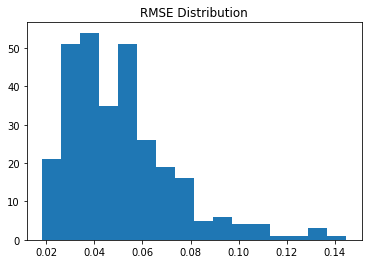

In [0]:
## RMSE by sample
RMSE_1 = []
dev_y_pred5 = predict5(dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred5[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1])
print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution')

107 0.01817136910147099
142 0.01866807936689809
264 0.01900737671623394
53 0.14492848545028433
141 0.1352645129871397
212 0.1343505119492241


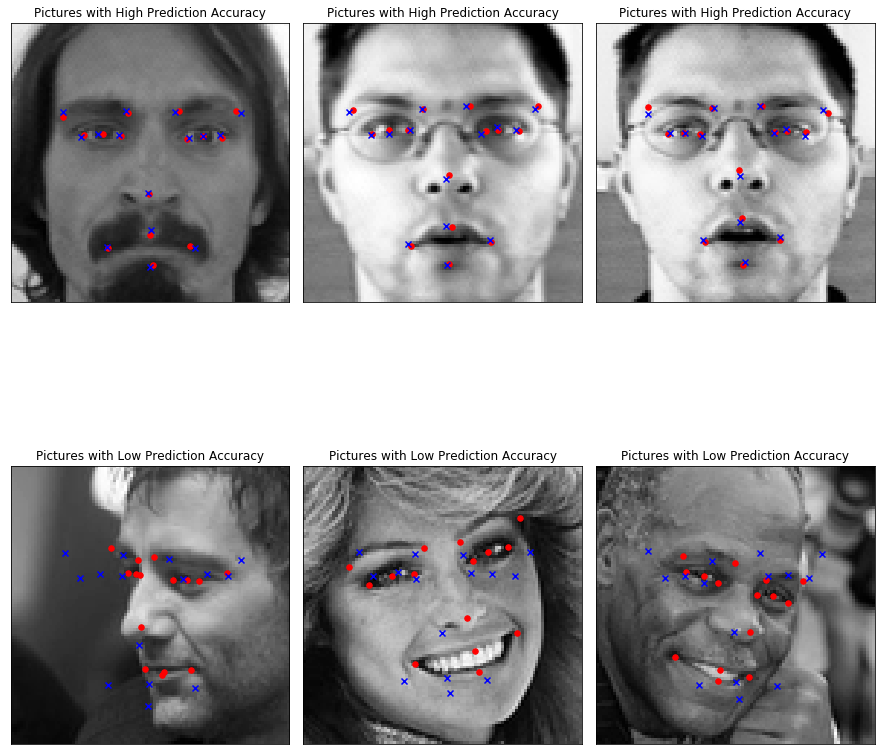

In [0]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    plot_example(dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred5[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')
for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred5[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')

plt.show()


### Part 2 Conclusion: Multi-Layer Neural Network
The conclusion of optimal model is :
*   Model:Multi-Layer Neural Network 
    * Tanh Activation Function
    * 600 hidden nodes
    * 1 hidden layer
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 50 (trade off between computation time and accuracy)
    
The performance of model:
*  The average RMSE for all keypoints is 0.056 for develop data
*  Compared with linear regression and single-layer neural network, RMSE for each keypoint pair does significantly increase
*  Based on histogram of RMSE for all develop data, the RMSE of prediction is 0.03 for most develop data.
*  The image with highest and lowest RMSE are shown above. It is obvious that when the picture is not centered, the model performance will decrease. When image shows side faces, the model will loss accuracy for prediction for the keypoints that are hidden in the image.




## Part 3: Improvement of Multilayer Neural Network with Modified Training Data
### Following training data is applied to improve performance of multi-layer neural network:
* Combination of Flipped and Original Train Data
* Accentrated Flipped and Original Train Data
* Blurred Flipped and Original Train Data

### Use the optimal learning rate, activation function and gradient descent method based on single-layer neural network

* Model: Multi-layer Neural Network
  * Number of Hidden Nodes: 600
  * Hidden Layer: 1
* Activation Function: tanh function 
* Cost Function: RMSE
  * Objective: Minimize RMSE
  * Mehod: Gradient Descent Method
      * mini-batch with batch size of 10
      * Learning Rate: 0.001



### Part 3.1 Combination of train data and flipped train data

RMSE (1, 0.08771531673961504)
RMSE (2, 0.08309341222671383)
RMSE (3, 0.07901604922205645)
RMSE (4, 0.07544774207792018)
RMSE (5, 0.07239549577822317)
RMSE (6, 0.06984539656631068)
RMSE (7, 0.06775278894617572)
RMSE (8, 0.06605232008404954)
RMSE (9, 0.0646723305764809)
RMSE (10, 0.06354559392908199)
RMSE (11, 0.06261464103622315)
RMSE (12, 0.061833110449106075)
RMSE (13, 0.06116496237612932)
RMSE (14, 0.060582838419824925)
RMSE (15, 0.06006627606197106)
RMSE (16, 0.059600101784919944)
RMSE (17, 0.05917311109427477)
RMSE (18, 0.058777038926260884)
RMSE (19, 0.0584057812926866)
RMSE (20, 0.05805481781213786)
RMSE (21, 0.05772078774202119)
RMSE (22, 0.057401180209713965)
RMSE (23, 0.0570941081630656)
RMSE (24, 0.05679814329122712)
RMSE (25, 0.05651219528125873)
RMSE (26, 0.0562354233474608)
RMSE (27, 0.055967171289873774)
RMSE (28, 0.05570691972511886)
RMSE (29, 0.05545425085443608)
RMSE (30, 0.05520882238710835)
RMSE (31, 0.054970348157116274)
RMSE (32, 0.054738583647276)
RMSE (33, 0.0545

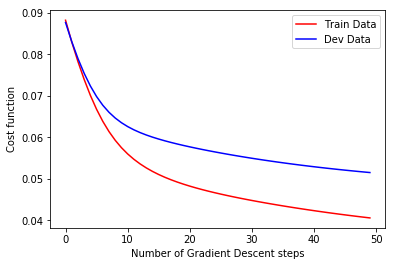

In [0]:
## (1) Parameters
# Get number of features
num_features1 = moar_data.shape[1]
# Then get the number of keypoints from labels
num_labels1 = moar_labels.shape[1]

numHiddenNodes_high = 600 
w8_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w8_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params8 = [w8_1, w8_2]


## (2) Model
X8 = T.matrix()
Y8 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model8(X8, w8_1, w8_2):
    return T.tanh(T.dot(T.tanh(T.dot(X8, w8_1)), w8_2))
y_hat8 = model8(X8, w8_1, w8_2)


## (3) Cost...same as logistic regression
cost8 = T.sqrt(T.mean((Y8 - y_hat8)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha8 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha8])
    return updates
update8 = backprop(cost8, params8)
train8 = theano.function(inputs=[X8, Y8], outputs=cost8, updates=update8, allow_input_downcast=True)
predict8 = theano.function(inputs=[X8], outputs=y_hat8, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(moar_data), miniBatchSize), range(miniBatchSize, len(moar_data), miniBatchSize)):
            cost8 = train8(moar_data[start:end], moar_labels[start:end])
        cost_vec.append(cost8)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict8(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

### Part 3.2 Accentrated Data 
Explain the method used in previous section to get accentrated data

RMSE (1, 0.1004280899422571)
RMSE (2, 0.0927362788907967)
RMSE (3, 0.08660449872997847)
RMSE (4, 0.08174094896246313)
RMSE (5, 0.07793559011579261)
RMSE (6, 0.07496775600896305)
RMSE (7, 0.07263120001645355)
RMSE (8, 0.0707571919231005)
RMSE (9, 0.06921896365583885)
RMSE (10, 0.06792559118654636)
RMSE (11, 0.06681317751078528)
RMSE (12, 0.06583701214294387)
RMSE (13, 0.06496564708750834)
RMSE (14, 0.06417672778931141)
RMSE (15, 0.0634541481242535)
RMSE (16, 0.06278612889967405)
RMSE (17, 0.06216391930514428)
RMSE (18, 0.061580913656245)
RMSE (19, 0.06103204485039128)
RMSE (20, 0.060513363179063126)
RMSE (21, 0.06002174031539819)
RMSE (22, 0.059554658627029175)
RMSE (23, 0.05911005922856289)
RMSE (24, 0.058686230907769)
RMSE (25, 0.05828172785084953)
RMSE (26, 0.05789530797126162)
RMSE (27, 0.05752588625206671)
RMSE (28, 0.05717249925442362)
RMSE (29, 0.05683427810016525)
RMSE (30, 0.056510427996539374)
RMSE (31, 0.056200212871542206)
RMSE (32, 0.055902944022020444)
RMSE (33, 0.05561797

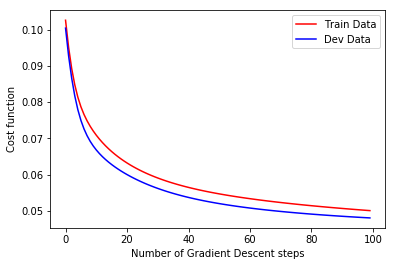

In [0]:
## (1) Parameters
# Get number of features
num_features1 = Accentrated_train_X.shape[1]
# Then get the number of keypoints from labels
num_labels1 = moar_labels.shape[1]

numHiddenNodes_high = 600 
w9_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w9_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params9 = [w9_1, w9_2]


## (2) Model
X9 = T.matrix()
Y9 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model9(X9, w9_1, w9_2):
    return T.tanh(T.dot(T.tanh(T.dot(X9, w9_1)), w9_2))
y_hat9 = model9(X9, w9_1, w9_2)


## (3) Cost...same as logistic regression
cost9 = T.sqrt(T.mean((Y9 - y_hat9)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha9 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha9])
    return updates
update9 = backprop(cost9, params9)
train9 = theano.function(inputs=[X9, Y9], outputs=cost9, updates=update9, allow_input_downcast=True)
predict9 = theano.function(inputs=[X9], outputs=y_hat9, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(Accentrated_train_X), miniBatchSize), range(miniBatchSize, len(Accentrated_train_X), miniBatchSize)):
            cost9 = train9(Accentrated_train_X[start:end], moar_labels[start:end])
        cost_vec.append(cost9)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict9(Accentrated_dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

### Part 3.3 Blur Data 
A image processing technique (Gaussian blurring) is used to smooth an image. Gussian blurring is the weight of a pixel's influence is determined by a Guassian function over the distance to the relevant pixel.

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


RMSE (1, 0.12708070477548686)
RMSE (2, 0.0977319901460788)
RMSE (3, 0.09645464254493373)
RMSE (4, 0.09558800378070846)
RMSE (5, 0.09478816243581373)
RMSE (6, 0.09402160734728537)
RMSE (7, 0.09327552815301819)
RMSE (8, 0.0925405287420507)
RMSE (9, 0.09180883699457383)
RMSE (10, 0.09107399865932901)
RMSE (11, 0.09033073993860166)
RMSE (12, 0.08957486503715963)
RMSE (13, 0.08880317794719787)
RMSE (14, 0.08801342424803545)
RMSE (15, 0.08720424625899156)
RMSE (16, 0.08637514413503011)
RMSE (17, 0.0855264361435765)
RMSE (18, 0.0846592126517998)
RMSE (19, 0.08377527989673379)
RMSE (20, 0.0828770912193907)
RMSE (21, 0.08196766500910774)
RMSE (22, 0.08105049004480547)
RMSE (23, 0.08012942017072705)
RMSE (24, 0.07920856125550611)
RMSE (25, 0.07829215412012216)
RMSE (26, 0.07738445756202084)
RMSE (27, 0.07648963574265549)
RMSE (28, 0.07561165405062072)
RMSE (29, 0.07475418712318631)
RMSE (30, 0.07392054204152966)
RMSE (31, 0.07311359886138784)
RMSE (32, 0.07233576966809832)
RMSE (33, 0.0715889763

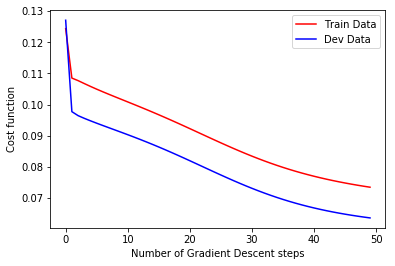

In [0]:
## (1) Parameters
# Get number of features
num_features1 = Blur_train_X.shape[1]
# Then get the number of keypoints from labels
num_labels1 = moar_labels.shape[1]

numHiddenNodes_high = 600 
w10_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w10_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params10 = [w10_1, w10_2]


## (2) Model
X10 = T.matrix()
Y10 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model10(X10, w10_1, w10_2):
    return T.tanh(T.dot(T.tanh(T.dot(X10, w10_1)), w10_2))
y_hat10 = model10(X10, w10_1, w10_2)


## (3) Cost...same as logistic regression
cost10 = T.sqrt(T.mean((Y10 - y_hat10)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha10 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha10])
    return updates
update10 = backprop(cost10, params10)
train10 = theano.function(inputs=[X10, Y10], outputs=cost10, updates=update10, allow_input_downcast=True)
predict10 = theano.function(inputs=[X10], outputs=y_hat10, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(Blur_train_X), miniBatchSize), range(miniBatchSize, len(Blur_train_X), miniBatchSize)):
            cost10 = train10(Blur_train_X[start:end], moar_labels[start:end])
        cost_vec.append(cost10)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict10(Blur_dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

In [0]:
 pd.DataFrame(np.sqrt(mean_squared_error(dev_y, predict9(Accentrated_dev_X), multioutput='raw_values')),columns=['RMSE'], index=dev_labels).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.077249
mouth_center_top_lip_y,0.067395
nose_tip_y,0.067310
mouth_left_corner_y,0.063892
mouth_right_corner_y,0.061433
left_eyebrow_outer_end_y,0.056054
left_eyebrow_outer_end_x,0.055137
right_eyebrow_outer_end_y,0.055073
mouth_right_corner_x,0.053625
right_eyebrow_outer_end_x,0.052919


[[16, 0.015739062078367002], [15, 0.01791038146934257], [253, 0.018416496050541922], [184, 0.01923430219073459], [77, 0.019886137273429524]]


Text(0.5, 1.0, 'RMSE Distribution')

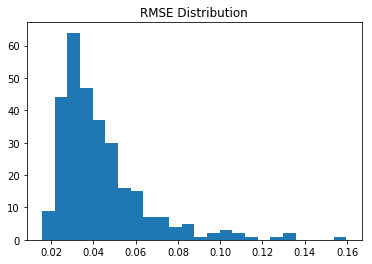

In [0]:
## RMSE by sample
RMSE_1 = []
dev_y_pred9 = predict9(Accentrated_dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred9[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1])
print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution')

16 0.015739062078367002
15 0.01791038146934257
253 0.018416496050541922
90 0.15970418517999407
53 0.13520445981697798
203 0.12992246469803007


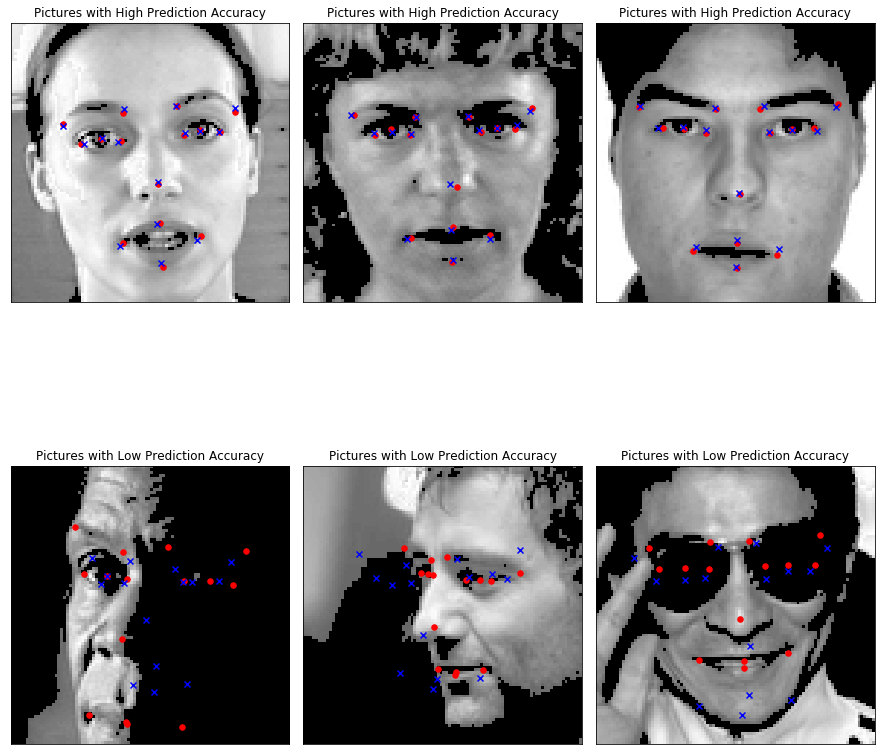

In [0]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    plot_example(Accentrated_dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred9[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')
for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(Accentrated_dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred9[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')

plt.show()


### Part 3 Conclusion: Multi-Layer Neural Network with Improved Train Data
The conclusion of optimal model is :
*   Accentrated train data which is extended by flipping train data
*   Model:Multi-Layer Neural Network 
    * Tanh Activation Function
    * 600 hidden nodes
    * 1 hidden layer
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 50 (trade off between computation time and accuracy)
    
The performance of model:
*  The average RMSE for all keypoints is 0.05 for develop data
*  RMSE for each keypoint pair is improved with larger size of accentrated train data
*  Based on histogram of RMSE for all develop data, the RMSE of prediction is 0.03 for most develop data.
*  The image with highest and lowest RMSE are shown above. It is obvious that when the picture is not centered or picture shows people with sunglasses, the model performance will decrease. 


# 9. Neural Net Classification & Scoring  

Note - this example is from Week7 which requireds binarizing the labels before processing - not sure this is what we want.  
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

DO: Single Layer  
Do: Two Layer  
Score Each  

QUESTION: Do we use RMSE as the cost function, or only to evaluate performance at the end ? I think it is just at the end...

In [0]:
# Single Layer
# (1) Parameters 
# Initialize the weights to small, but non-zero, value
numFeatures = train_X[1].size
print(numFeatures)
numClasses = train_y[1].size
print(numClasses)

# Just me trying to understand the code
# z = (np.random.randn(*(numFeatures, numClasses))*0.01)
# print(z.shape, type(z))
# z2 = np.asarray(z)
# print(z2.shape, type(z2))

w = theano.shared((np.random.randn(*(numFeatures, numClasses))*.01))
print(w.ndim,type(w),type(w.get_value()))
print(w.dtype)
print(w.nonzero(), w.shape)

9216
30
2 <class 'theano.tensor.sharedvar.TensorSharedVariable'> <class 'numpy.ndarray'>
float64
(Subtensor{int64}.0, Subtensor{int64}.0) Shape.0


In [0]:
## (2) Model
# Theano objects accessed with standard Python variables
# using Softmax - i.e. basically just a multi-class version of sigmoid activation
X = T.matrix()
Y = T.matrix()

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))
y_hat = model(X, w)

In [0]:
## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y)) # Original cost function from tutorial
# cost = T.mean((Y - y_hat)**2) # RMSE error

In [0]:
## (4) Objective (and solver) Batch Gradient Descent

alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_X[0:len(train_X)], train_y[0:len(train_y)])
        trainTime =  trainTime + (time.time() - start_time)
        #print('%d) RMSE = %.4f' %(i+1, T.mean(((Y-y_hat)**2))))  # test on Dev data
        print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(dev_y, axis=1) == predict(dev_X))))  # test on Dev data
    print('train time = %.2f' %(trainTime))

gradientDescent(10)

start_time = time.time()
predict(dev_X)    # Not sure why this is here
RMSE = (T.mean((Y - y_hat)**2))**0.5
print('RMSE = ',RMSE)
print('predict time = %.2f' %(time.time() - start_time))

1) accuracy = 0.7047
2) accuracy = 0.7047
3) accuracy = 0.7047
4) accuracy = 0.7047
5) accuracy = 0.7047
6) accuracy = 0.7047
7) accuracy = 0.7047
8) accuracy = 0.7047
9) accuracy = 0.7047
10) accuracy = 0.7047
train time = 2.11
RMSE =  Elemwise{pow,no_inplace}.0
predict time = 0.03


Single Layer Batch Gradient Descent, 0.7047 is the accuracy. 

---



In [0]:
# Now we use Stochastic to run the Gradient Descent:
## (1) Parameters
w = theano.shared((np.random.randn(*(numFeatures, numClasses))*.01))

## (2) Model
X = T.matrix()
Y = T.matrix()
def model(X, w):
    return T.nnet.softmax(T.dot(X, w))
y_hat = model(X, w)

## (3) Cost
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))

## (4) Objective
alpha = 0.01
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) 
y_pred = T.argmax(y_hat, axis=1) 
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

miniBatchSize = 2
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost = train(train_X[start:end], train_y[start:end])
        trainTime =  trainTime + (time.time() - start_time)
        print('accuracy = ', (i+1, np.mean(np.argmax(dev_y, axis=1) == predict(dev_X))))
    print('train time = ', trainTime)
    
gradientDescentStochastic(10)

start_time = time.time()
predict(dev_X)   
print('predict time = ', (time.time() - start_time))

accuracy =  (1, 0.7046979865771812)
accuracy =  (2, 0.7046979865771812)
accuracy =  (3, 0.7046979865771812)
accuracy =  (4, 0.7046979865771812)
accuracy =  (5, 0.7046979865771812)
accuracy =  (6, 0.7046979865771812)
accuracy =  (7, 0.7046979865771812)
accuracy =  (8, 0.7046979865771812)
accuracy =  (9, 0.7046979865771812)
accuracy =  (10, 0.7046979865771812)
train time =  43.28723621368408
predict time =  0.018946170806884766


Pure Stochastic (mini-batch size = 1, results in 0 prediction accuracy). Mini-batch size must be at least 2. Then it doesn't matter how big you make it, the result is still 70.47%, same as batch. No improvement in accuracy.



---



Next Steps - do some/all/none of the following:
- Try Stochastic and Mini-Batch 
- Try 2 and 3 layer models
- Try using a different activation - like rectifier and/or max pooling
- Try adding noise (like Dropouts) - can increase generalization and training speeds

##Multi-layer Neural Networks

In [0]:
## (1) Parameters
numHiddenNodes = 600 
w_1 = theano.shared(np.asarray((np.random.randn(*(numFeatures, numHiddenNodes))*.01)))
w_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numClasses))*.01)))
params = [w_1, w_2]


## (2) Model
X = T.matrix()
Y = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer still uses sigmoid
def model(X, w_1, w_2):
    return T.nnet.softmax(T.dot(T.nnet.sigmoid(T.dot(X, w_1)), w_2))
y_hat = model(X, w_1, w_2)


## (3) Cost...same as logistic regression
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))


## (4) Minimization.  Update rule changes to backpropagation.
alpha = 0.01
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha])
    return updates
update = backprop(cost, params)
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
y_pred = T.argmax(y_hat, axis=1)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

miniBatchSize = 1
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost = train(train_X[start:end], train_y[start:end])
        trainTime =  trainTime + (time.time() - start_time)
        print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(dev_y, axis=1) == predict(dev_X))))
    print('train time = %.2f' %(trainTime))

gradientDescentStochastic(50)

start_time = time.time()
predict(dev_X)   
print('predict time = %.2f' %(time.time() - start_time))


# 10. Convolutional Neural Net (CNN or ConvoNet)

**FINALLY**: *Convolutional NN*

- This is likely the prize - developed for image processing
- Need to reprocess data - uses 2D images (not 1D)
- Go to last section of Week7 Tutorial for code on Convolutional NNs
- Possibly do a generative model to create images and further train the network (e.g. by mirroring the faces - so making 2 faces out of one)


**need to work on predict function... not working.
cost function also should be different from Week 7 tutorial.
RMSE seems like the right metric to use. 

In [0]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

## (1) Parameters
numHiddenNodes = 600 
patchWidth = 3
patchHeight = 3
featureMapsLayer1 = 32
#featureMapsLayer2 = 64
#featureMapsLayer3 = 128

# For convonets, we will work in 2d rather than 1d.  The images are 96x96 in 2d.
imageWidth = 96
#train_data = train_X.reshape(-1, 1, imageWidth, imageWidth)
#dev_data = dev_X.reshape(-1, 1, imageWidth, imageWidth)

# Convolution layers.  
w_1 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer1, 1, patchWidth, patchHeight))*.01)))
#w_2 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer2, featureMapsLayer1, patchWidth, patchHeight))*.01)))
#w_3 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer3, featureMapsLayer2, patchWidth, patchHeight))*.01)))

# Fully connected NN. 
w_4 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer1 * 49 * 49, numHiddenNodes))*.01)))
w_5 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numClasses))*.01))) #how do we get the number of classes
params = [w_1, w_4, w_5]

## (2) Model
theano.config.floatX = 'float64'
X = T.tensor4() # conv2d works with tensor4 type
Y = T.matrix()

srng = RandomStreams()
def dropout(X, p=0.):
    if p > 0:
        X *= srng.binomial(X.shape, p=1 - p)
        X /= 1 - p
    return X

# Theano provides built-in support for add convolutional layers
def model(X, w_1, w_4, w_5, p_1, p_2):
    l1 = dropout(pool_2d(T.maximum(conv2d(X, w_1, border_mode='full'),0.), (2, 2)), p_1)
   # l2 = dropout(pool_2d(T.maximum(conv2d(l1, w_2), 0.), (2, 2)), p_1)
   # l3 = dropout(T.flatten(pool_2d(T.maximum(conv2d(l2, w_3), 0.), (2, 2)), outdim=2), p_1) # flatten to switch back to 1d layers
    l4 = dropout(T.maximum(T.dot(l1, w_4), 0.), p_2)
    return T.dot(l4, w_5) #T.nnet.softmax(T.dot(l4, w_5))

y_hat_train = model(X, w_1, w_4, w_5, 0.2, 0.5)
y_hat_predict = model(X, w_1, w_4, w_5, 0., 0.)
#y_x = T.argmax(y_hat, axis=1)

## (3) Cost
cost = T.sum(T.sqr(Y - y_hat_train))
               
#cost = T.mean(T.nnet.categorical_crossentropy(y_hat_train, Y)) #rank mismatch between coding and true distributions

## (4) Minimization.  
def backprop(cost, w, alpha=0.0001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        
        # adding gradient scaling
        acc = theano.shared(w1.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * grad ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        grad = grad / gradient_scaling
        updates.append((acc, acc_new))
        
        updates.append((w1, w1 - grad * alpha))
    return updates

update = backprop(cost, params)
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
#y_pred = T.argmax(y_hat_predict, axis=1)
#predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_hat_predict, allow_input_downcast=True)


miniBatchSize = 1
# def gradientDescent(epochs):
#     trainTime = 0.0
#     predictTime = 0.0
#     cost_vec = []
#     for i in range(epochs):
#         start_time = time.time()
#         cost = train(train_X[0:len(train_X)], train_y[0:len(train_X)])
#         cost_vec.append(cost)
#         trainTime =  trainTime + (time.time() - start_time)
#         #print('accuracy = ', np.sqrt(np.sum((dev_y - predict(dev_X))**2)/float(len(dev_y))))
#         print('RMSE', (i+1, np.sqrt(mean_squared_error(dev_y, predict(dev_X), multioutput='uniform_average'))))
#         # print('accuracy = ', (i+1, r2_score(dev_y, predict(dev_X)))) 

def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    start_time = time.time()
    
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost = train(train_X[start:end], train_y[start:end])
       
        trainTime =  trainTime + (time.time() - start_time)
        print('RMSE', (i+1, np.sqrt(mean_squared_error(dev_y, predict(dev_X), multioutput='uniform_average'))))
        print('train time = %.2f' %(trainTime))

print(train_X[0].shape)
print(y_hat_predict[0])
gradientDescentStochastic(10)

start_time = time.time()
#print(predict(dev_X))   #having problems with the predict function..
print('predict time = %.2f' %(time.time() - start_time))


# 10. Conclusions  

Make sure to write up summary of different methods, results based on Dev and then on Test (maybe present in table). 